# Analysing Ultra Marathons - Preparation & Participation

In [14]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The primary objectives for obtaining data was to find an ultramarathon with several renewals of the race, similar yearly routes, pacing per stage information and a large number of runners. The datasets of the Ultra Trail du Mont Blanc (UTMB) matched all of these objectives.  
The UTMB takes places once a year, usually at the end of August, and follows the route of the Tour du Mont Blanc through France, Italy and Switzerland. It is about 170 kilometres long, split into roughly 25 stages, which can consist of slight route changes every year. It began in 2003, and since then it has become one of the most popular ultramarathon races in the world with more than 2,200 starters every year. The gradient of Mont Blanc offer unique challenges not seen anywhere else in the world. The total elevation of more that 10,000 metres has contributed to it being widely regarded as one of the most difficult foot races in the world. The difficulty is enhanced by the adverse weather that is often present in the Alps. The world record time for the UTMB was recorded in 2017, with a time of 19 hours, 1 minute and 54 seconds. The best runners usually take just over twenty hours to complete the UTMB, but many take over forty hours, meaning running through two full nights is required to finish the race. 

In this notebook, I load, pre-process and combine the UTMB results dataset. 

## Read 2017

The most recent year in the dataset was 2017. I first check if the path to the csv file that contains the 2017 data exists, and when that works I read in the csv file to a dataframe. I check the head and shape of the dataframe to check that all the data has been read properly. 

In [15]:
if not os.path.exists( "../../raw/utmb_2017.csv" ):
    print("Missing dataset file")

In [16]:
df17 = pd.read_csv( "../../raw/utmb_2017.csv")

In [17]:
df17.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Delevret,St-Gervais,Contamines,La Balme,Bonhomme,Chapieux,Col Seigne,Lac Combal,Mt-Favre,Checruit,Courmayeur,Bertone,Bonatti,Arnouvaz,Col Ferret,La Fouly,Champex La,La Giète,Trient,Les Tseppe,Vallorcine,Col Montet,Flégère,Arrivée
0,0,4,D'HAENE François,Salomon,SE H,1,FR,19:01:54,00:00:00,01:11:50,01:45:05,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,14:55:05,15:24:59,16:06:17,16:51:13,17:20:02,18:23:09,19:01:54
1,1,2,JORNET BURGADA Kilian,Salomon,SE H,2,ES,19:16:59,00:15:05,01:10:00,01:44:21,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,15:13:06,15:41:22,16:23:16,17:05:14,17:34:21,18:39:27,19:16:59
2,2,14,TOLLEFSON Tim,Hoka,SE H,3,US,19:53:00,00:51:06,01:15:24,01:48:38,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,15:45:55,16:12:00,16:56:16,17:39:45,18:09:03,19:17:41,19:53:00
3,3,7,THEVENARD Xavier,Asics,SE H,4,FR,20:03:39,01:01:45,01:11:51,01:45:08,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,15:58:54,16:28:53,17:12:35,17:55:20,18:23:24,19:28:04,20:03:39
4,4,1,WALMSLEY Jim,Hoka,SE H,5,US,20:11:38,01:09:44,01:09:59,01:42:15,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,16:11:03,16:35:32,17:14:48,17:52:03,18:23:11,19:33:35,20:11:38


In [18]:
df17.shape

(2535, 33)

I add a year column. This will make it easier to distinguish years from each other in later analysis. 

In [19]:
df17['Year'] = '2017'

In [20]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 34 columns):
Unnamed: 0     2535 non-null int64
bib            2535 non-null int64
name           2535 non-null object
team           1786 non-null object
category       2535 non-null object
rank           2535 non-null int64
nationality    2535 non-null object
time           2535 non-null object
timediff       2535 non-null object
Delevret       2526 non-null object
St-Gervais     2524 non-null object
Contamines     2502 non-null object
La Balme       2439 non-null object
Bonhomme       2418 non-null object
Chapieux       2425 non-null object
Col Seigne     2356 non-null object
Lac Combal     2366 non-null object
Mt-Favre       2287 non-null object
Checruit       2299 non-null object
Courmayeur     2287 non-null object
Bertone        2170 non-null object
Bonatti        2159 non-null object
Arnouvaz       2155 non-null object
Col Ferret     1961 non-null object
La Fouly       1959 non-null obj

The column names offer a bit of a concundrum. As you will see when the rest of the csv files are read in to dataframes, the stage names are often spelt differently or abbreviated. These will have to be consistent throughout. Another problem is that the stage sequence can often be different. For example one year can start with Chamonix and go to St-Gervais, and others start with Chamonix and go to Delevret. For this reason I had to name each stage along side their preceding stage. 

In [21]:
df17.rename(columns={  
    'Delevret': 'Chamonix to Delevret',        
'St-Gervais': 'Delevret to St-Gervais', 
'Contamines': 'St-Gervais to Contamines',     
'La Balme': 'Contamines to La Balme',
'Bonhomme': 'La Balme to Bonhomme',       
'Chapieux': 'Bonhomme to Chapieux',       
'Col Seigne': 'Chapieux to Col Seigne',      
'Lac Combal': 'Col Seigne to Lac Combal',     
'Mt-Favre': 'Lac Combal to Mt-Favre',       
'Checruit' : 'Mt-Favre to Checruit',      
'Courmayeur'  : 'Checruit to Courmayeur',   
'Bertone': 'Courmayeur to Bertone',       
'Bonatti': 'Bertone to Bonatti',        
'Arnouvaz': 'Bonatti to Arnouvaz',       
'Col Ferret' : 'Arnouvaz to Col Ferret',    
'La Fouly': 'Col Ferret to La Fouly',       
'Champex La': 'La Fouly to Champex La',     
'La Giète' : 'Champex La to Giete',      
'Trient' :     'Giete to Trient',    
'Les Tseppe'  : 'Trient to Les Tseppe',   
'Vallorcine'  : 'Les Tseppe to Vallorcine',  
'Col Montet'  : 'Vallorcine to Col Montet',   
'Flégère' : 'Col Montet to Flegere',       
'Arrivée' : 'Flegere to Chamonix'}, inplace=True)       

In [22]:
df17.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Giete,Giete to Trient,Trient to Les Tseppe,Les Tseppe to Vallorcine,Vallorcine to Col Montet,Col Montet to Flegere,Flegere to Chamonix,Year
0,0,4,D'HAENE François,Salomon,SE H,1,FR,19:01:54,00:00:00,01:11:50,01:45:05,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,14:55:05,15:24:59,16:06:17,16:51:13,17:20:02,18:23:09,19:01:54,2017
1,1,2,JORNET BURGADA Kilian,Salomon,SE H,2,ES,19:16:59,00:15:05,01:10:00,01:44:21,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,15:13:06,15:41:22,16:23:16,17:05:14,17:34:21,18:39:27,19:16:59,2017
2,2,14,TOLLEFSON Tim,Hoka,SE H,3,US,19:53:00,00:51:06,01:15:24,01:48:38,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,15:45:55,16:12:00,16:56:16,17:39:45,18:09:03,19:17:41,19:53:00,2017
3,3,7,THEVENARD Xavier,Asics,SE H,4,FR,20:03:39,01:01:45,01:11:51,01:45:08,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,15:58:54,16:28:53,17:12:35,17:55:20,18:23:24,19:28:04,20:03:39,2017
4,4,1,WALMSLEY Jim,Hoka,SE H,5,US,20:11:38,01:09:44,01:09:59,01:42:15,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,16:11:03,16:35:32,17:14:48,17:52:03,18:23:11,19:33:35,20:11:38,2017


In [23]:
df17.to_csv('../../data/df17_full.csv')

This process is then carried out with the rest of the years available...

## Read 2016

In [24]:
if not os.path.exists( "../../raw/utmb_2016.csv" ):
    print("Missing dataset file")

In [25]:
df16 = pd.read_csv( "../../raw/utmb_2016.csv")

In [26]:
df16['Year'] = '2016'
df16.head()
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 36 columns):
Unnamed: 0     2554 non-null int64
bib            2554 non-null int64
name           2554 non-null object
team           1987 non-null object
category       2554 non-null object
rank           2554 non-null int64
nationality    2554 non-null object
time           2554 non-null object
timediff       2554 non-null object
Delevret       2554 non-null object
St Gervais     2553 non-null object
Contamines     2508 non-null object
Balme          2395 non-null object
Bonhomme       2374 non-null object
Chapieu        2367 non-null object
Seigne         2276 non-null object
Combal         2253 non-null object
MtFavre        2178 non-null object
Checrou        2186 non-null object
Courm1         2145 non-null object
Courm2         2056 non-null object
Villaz         0 non-null float64
Bertone        1940 non-null object
Bonatti        1920 non-null object
Arnuva         1910 non-null objec

In [27]:
df16.rename(columns={ 
    'Delevret':  'Chamonix to Delevret',    
'St Gervais'   : 'Delevret to St-Gervais',
'Contamines'    : 'St-Gervais to Contamines',
'Balme'          : 'Contamines to La Balme',
'Bonhomme'      :'La Balme to Bonhomme',
'Chapieu'     :  'Bonhomme to Chapieux',
'Seigne'       :  'Chapieux to Col Seigne',
'Combal'        : 'Col Seigne to Lac Combal',
'MtFavre'        : 'Lac Combal to Mt-Favre',
'Checrou'       : 'Mt-Favre to Checruit',
'Courm1'       :  'Checruit to Courmayeur',
'Courm2'     : 'Courmayeur to Courmayeur2',
'Villaz'      :   'Courmayeur2 to Bertone', #Courmeyeur2 is Villaz
'Bertone'      :  'Courmayeur to Bertone',
'Bonatti'       : 'Bertone to Bonatti',
'Arnuva'         : 'Bonatti to Arnouvaz',
'GdColF'        :  'Arnouvaz to Col Ferret',
'Fouly'          : 'Col Ferret to La Fouly',
'Champex'       : 'La Fouly to Champex La',
'Giete'         : 'Champex La to Giete',
'Trient'         : 'Giete to Trient',
'Catogne'       :  'Trient to La Catogne',
'Vallo'         : 'La Catogne to Vallorcine',
'TaVents'       : 'Vallorcine to Tete aux Vents',
'Flegere'       : 'Tete aux Vents to Flegere',
'Arrivee'       : 'Flegere to Chamonix'}, inplace=True)
    

In [28]:
df16.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Giete,Giete to Trient,Trient to La Catogne,La Catogne to Vallorcine,Vallorcine to Tete aux Vents,Tete aux Vents to Flegere,Flegere to Chamonix,Year
0,0,25,POMMERET Ludovic,HOKA - CABB,V1 H,1,FR,22:00:02,00:00:00,01:16:24,01:49:50,02:54:04,04:10:14,05:30:18,06:04:46,07:38:37,08:24:38,09:04:12,09:28:30,09:56:43,10:01:23,NaN,10:57:27,11:53:41,12:33:15,13:27:27,14:20:36,15:56:23,17:30:57,17:57:55,18:54:44,19:25:32,20:50:37,21:17:39,22:00:02,2016
1,1,9,GRINIUS Gediminas,TEAM VIBRAM,SE H,2,LT,22:26:05,00:26:03,01:19:40,01:55:12,02:57:34,03:57:47,05:03:24,05:33:19,07:06:39,08:00:44,08:46:55,09:14:33,09:43:33,09:46:58,NaN,10:51:46,11:49:16,12:26:30,13:25:55,14:19:50,15:51:13,17:29:39,17:58:21,19:05:42,19:39:49,21:15:17,21:44:08,22:26:05,2016
2,2,12,TOLLEFSON Tim,NIKE TRAIL,SE H,3,US,22:30:28,00:30:26,01:23:03,02:00:31,03:02:34,04:01:59,05:05:41,05:36:49,07:16:59,08:18:03,09:00:35,09:28:27,09:58:08,10:00:25,NaN,11:03:42,12:03:21,12:39:38,13:36:43,14:35:30,16:12:36,17:55:17,18:21:58,19:29:24,20:04:06,21:24:54,21:52:03,22:30:28,2016
3,3,7,LANEY David,NIKE TRAIL,SE H,4,US,22:41:14,00:41:12,01:23:41,02:00:42,03:02:47,03:59:55,05:02:54,05:36:27,07:16:53,08:19:25,09:05:07,09:35:54,10:08:25,10:11:56,NaN,11:12:52,12:07:24,12:45:22,13:43:44,14:52:02,16:21:56,17:58:14,18:28:06,19:33:44,20:05:47,21:34:31,22:07:15,22:41:14,2016
4,4,28,DOMINGUEZ LEDO Javier,TEAM VIBRAM,V1 H,5,ES,22:44:16,00:44:14,01:20:59,01:56:49,03:01:46,04:01:54,05:05:30,05:36:40,07:12:47,08:03:48,08:46:24,09:13:24,09:42:22,09:43:57,NaN,10:48:30,11:48:39,12:30:54,13:32:24,14:28:27,16:11:34,17:53:22,18:24:29,19:35:05,20:10:10,21:41:49,22:10:11,22:44:16,2016


In [29]:
df16.to_csv('../../data/df16_full.csv')

## Read 2015

In [30]:
if not os.path.exists( "../../raw/utmb_2015.csv" ):
    print("Missing dataset file")

df15 = pd.read_csv( "../../raw/utmb_2015.csv")
df15['Year'] = '2015'
df15.head()
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 35 columns):
Unnamed: 0     2561 non-null int64
bib            2561 non-null int64
name           2561 non-null object
team           1894 non-null object
category       2561 non-null object
rank           2561 non-null int64
nationality    2561 non-null object
time           2561 non-null object
timediff       2561 non-null object
Delev          2560 non-null object
StGer          2555 non-null object
Conta          2523 non-null object
Balme          2396 non-null object
Bonhom         2386 non-null object
Chapieu        2385 non-null object
Seigne         2302 non-null object
Combal         2301 non-null object
MtFavre        2180 non-null object
Checrou        2179 non-null object
Courm1         2185 non-null object
Courm2         2128 non-null object
Bertone        1993 non-null object
Bonatti        1976 non-null object
Arnuva         1960 non-null object
GdColF         1863 non-null obj

In [31]:
df15.rename(columns={
    'Delev' :  'Chamonix to Delevret'  ,      
'StGer'      :  'Delevret to St-Gervais' , 
'Conta'    :'St-Gervais to Contamines',
'Balme'     :   'Contamines to La Balme' ,  
'Bonhom'     :   'La Balme to Bonhomme' , 
'Chapieu'     :  'Bonhomme to Chapieux',
'Seigne'       :  'Chapieux to Col Seigne',
'Combal'        : 'Col Seigne to Lac Combal',
'MtFavre'        : 'Lac Combal to Mt-Favre',
'Checrou'        : 'Mt-Favre to Checruit',
'Courm1'         : 'Checruit to Courmayeur',
'Courm2'         : 'Courmayeur to Courmayeur2',
'Bertone'        : 'Courmayeur2 to Bertone',
'Bonatti'        : 'Bertone to Bonatti',
'Arnuva'         : 'Bonatti to Arnouvaz',
'GdColF'         : 'Arnouvaz to Col Ferret',
'Fouly'          : 'Col Ferret to La Fouly',
'Champex'        : 'La Fouly to Champex La',
'Giete'          : 'Champex La to Giete',
'Trient'        : 'Giete to Trient',
'Catogne'       : 'Trient to La Catogne',
'Vallo'         : 'La Catogne to Vallorcine',
'TaVents'        : 'Vallorcine to Tete aux Vents',
'Flegere'        : 'Tete aux Vents to Flegere',
'Arrivee' : 'Flegere to Chamonix'}, inplace=True)
    


In [32]:
df15.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Giete,Giete to Trient,Trient to La Catogne,La Catogne to Vallorcine,Vallorcine to Tete aux Vents,Tete aux Vents to Flegere,Flegere to Chamonix,Year
0,0,8,THEVENARD Xavier,ASICS,SE H,1,FR,21:09:15,00:00:00,01:14:46,01:49:08,02:47:35,03:44:39,04:44:08,05:12:57,06:37:26,07:29:53,08:09:59,08:35:00,09:00:26,09:03:48,09:58:44,10:48:14,11:23:57,12:18:12,13:09:52,14:36:13,16:11:24,16:38:16,17:43:31,18:17:02,19:55:59,20:26:43,21:09:15,2015
1,1,3,HERNANDO ALZAGA Luis Alberto,ADIDAS TRAIL RUNNING,SE H,2,ES,21:57:17,00:48:02,01:13:15,01:47:29,02:47:30,03:45:07,04:44:04,05:12:50,06:37:28,07:30:15,08:10:07,08:35:04,09:00:39,09:04:40,10:01:40,10:53:13,11:28:43,12:27:16,13:34:19,15:12:12,17:09:05,17:37:55,18:50:49,19:22:44,20:52:31,21:19:17,21:57:17,2015
2,2,7,LANEY David,NIKE TRAIL ELITE,SE H,3,US,21:59:42,00:50:27,01:20:10,01:59:04,03:00:51,03:55:41,04:59:39,05:34:13,07:05:04,08:14:41,08:59:37,09:29:26,10:00:40,10:04:33,11:06:09,12:01:57,12:42:49,13:36:57,14:35:46,16:14:07,17:41:46,18:10:51,19:08:05,19:41:16,21:02:48,21:27:03,21:59:42,2015
3,3,14,SWANSON Seth,THE NORTH FACE,SE H,4,US,22:00:10,00:50:55,01:16:01,01:52:18,02:52:26,03:49:14,04:50:00,05:20:30,06:43:12,07:41:25,08:21:32,08:48:13,09:15:18,09:18:41,10:13:01,11:09:12,11:46:24,12:38:28,13:38:14,15:16:06,17:00:03,17:34:19,18:44:33,19:24:25,20:52:46,21:23:16,22:00:10,2015
4,4,15,ANTOLINOS Fabien,DMA TERRE DE RUNNING,SE H,5,FR,22:28:26,01:19:11,01:16:25,01:52:38,02:54:26,03:55:38,04:58:18,05:27:58,06:56:04,07:54:10,08:38:39,09:07:11,09:35:12,09:40:47,10:38:24,11:36:21,12:15:42,13:16:34,14:13:28,15:52:51,17:36:56,18:06:51,19:14:53,19:49:43,21:20:01,21:47:18,22:28:26,2015


In [33]:
df15.to_csv('../../data/df15_full.csv')

## Read 2014

In [34]:
if not os.path.exists( "../../raw/utmb_2014.csv" ):
    print("Missing dataset file")

df14 = pd.read_csv( "../../raw/utmb_2014.csv")
df14['Year'] = '2014'
df14.head()
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 34 columns):
Unnamed: 0     2431 non-null int64
bib            2431 non-null int64
name           2431 non-null object
team           1725 non-null object
category       2431 non-null object
rank           2431 non-null int64
nationality    2431 non-null object
time           2431 non-null object
timediff       2431 non-null object
Delev          2413 non-null object
StGer          2417 non-null object
Conta          2329 non-null object
Balme          2285 non-null object
Bonhom         2269 non-null object
Chapieu        2258 non-null object
Seigne         2150 non-null object
Combal         2153 non-null object
MtFavre        2092 non-null object
Checrou        2090 non-null object
Courm          2085 non-null object
Bertone        1945 non-null object
Bonatti        1897 non-null object
Arnuva         1913 non-null object
GdColF         1821 non-null object
Fouly          1801 non-null obj

In [35]:
df14.rename(columns={
    'Delev' : 'Chamonix to Delevret' , 
'StGer'  : 'Delevret to St-Gervais',
'Conta' : 'St-Gervais to Contamines'    ,
'Balme' : 'Contamines to La Balme' ,
'Bonhom' : 'La Balme to Bonhomme',
'Chapieu': 'Bonhomme to Chapieux',
'Seigne' : 'Chapieux to Col Seigne' ,
'Combal' : 'Col Seigne to Lac Combal',
'MtFavre'  : 'Lac Combal to Mt-Favre',
'Checrou' : 'Mt-Favre to Checruit',
'Courm'  : 'Checruit to Courmayeur',
'Bertone' : 'Courmayeur to Bertone',
'Bonatti': 'Bertone to Bonatti',
'Arnuva' : 'Bonatti to Arnouvaz',
'GdColF'  :  'Arnouvaz to Col Ferret',
'Fouly'   : 'Col Ferret to La Fouly',
'Champex' : 'La Fouly to Champex La',
'Giète'  : 'Champex La to Giete',
'Trient' : 'Giete to Trient',
'Catogne' :  'Trient to La Catogne' , 
'Vallo' : 'La Catogne to Vallorcine',
'TaVents' : 'Vallorcine to Tete aux Vents',
'Flégère'  :  'Tete aux Vents to Flegere',
'Arrivée'  : 'Flegere to Chamonix'}, inplace=True) 
     


In [36]:
df14.to_csv('../../data/df14_full.csv')

## Read 2013

In [37]:
if not os.path.exists( "../../raw/utmb_2013.csv" ):
    print("Missing dataset file")

df13 = pd.read_csv( "../../raw/utmb_2013.csv")
df13['Year'] = '2013'
df13.head()
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 34 columns):
Unnamed: 0     2468 non-null int64
bib            2468 non-null int64
name           2468 non-null object
team           1767 non-null object
category       2468 non-null object
rank           2468 non-null int64
nationality    2468 non-null object
time           2468 non-null object
timediff       2468 non-null object
Delev          2467 non-null object
StGer          2465 non-null object
Conta          2437 non-null object
Balme          2342 non-null object
Bonhom         2318 non-null object
Chapieu        2317 non-null object
Seigne         2239 non-null object
Combal         2234 non-null object
MtFavre        2177 non-null object
Checrou        2170 non-null object
Courm          2168 non-null object
Bertone        2021 non-null object
Bonatti        1990 non-null object
Arnuva         2008 non-null object
GdColF         1906 non-null object
Fouly          1900 non-null obj

In [38]:
df13.rename(columns={
    
'Delev'  :  'Chamonix to Delevret',
'StGer'   : 'Delevret to St-Gervais',
'Conta'    : 'St-Gervais to Contamines',
'Balme'    :   'Contamines to La Balme',
'Bonhom'    :  'La Balme to Bonhomme',
'Chapieu'   :  'Bonhomme to Chapieux',
'Seigne'     :  'Chapieux to Col Seigne',
'Combal'      :  'Col Seigne to Lac Combal',
'MtFavre'      :  'Lac Combal to Mt-Favre',
'Checrou'       : 'Mt-Favre to Checruit',
'Courm'         : 'Checruit to Courmayeur',
'Bertone'   : 'Courmayeur to Bertone',
'Bonatti'   :    'Bertone to Bonatti',  
'Arnuva'     :   'Bonatti to Arnouvaz',  
'GdColF'      :  'Arnouvaz to Col Ferret', 
'Fouly'        :  'Col Ferret to La Fouly',
'Champex'       : 'La Fouly to Champex La',
'Bovine'         : 'Champex La to Bovine',
'Trient'    :   'Bovine to Trient',
'Catogne'    :    'Trient to La Catogne',
'Vallo'       :   'La Catogne to Vallorcine',
'TaVents'      :  'Vallorcine to Tete aux Vents',
'Flégère'       : 'Tete aux Vents to Flegere',
'Arrivé': 'Flegere to Chamonix'}, inplace=True)
    
   

In [39]:
df13.to_csv('../../data/df13_full.csv')

## Read 2012

The data for 2012 raised an issue. This race was also cut short by around 70km due to bad weather. Once again, I felt 70km of a usually 171km race was too great of a margin to compare it to the rest of the races, so I discounted it from the combined data frame.

In [40]:
if not os.path.exists( "../../raw/utmb_2012.csv" ):
    print("Missing dataset file")

df12 = pd.read_csv( "../../raw/utmb_2012.csv")
df12['Year'] = '2012'
df12.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Delev,StGer,Conta,Balme,conta r,bellevu,houches,gare pp,argenti,-1km,arrivee,Year
0,0,1508,D'HAENE François,NaN,SE H,1,FR,10:32:36,00:00:00,01:13:43,01:46:47,02:37:58,03:28:33,04:52:08,06:23:31,06:48:48,08:00:14,09:36:18,NaN,10:32:36,2012
1,1,1504,BUUD Jonas,IFK MORA,SE H,2,SE,11:03:19,00:30:43,01:15:21,01:47:51,02:39:11,03:30:51,05:01:23,06:40:05,07:07:24,08:26:36,10:09:24,10:59:50,11:03:19,2012
2,2,11,FOOTE Michael,THE NORTH FACE,SE H,3,US,11:19:00,00:46:24,01:15:36,01:53:13,02:51:49,03:52:54,05:27:29,07:05:02,07:33:01,08:50:13,10:25:40,11:15:35,11:19:00,2012
3,3,5,SA Carlos,BERG,SE H,4,PT,11:22:39,00:50:03,01:13:32,01:46:52,02:39:11,03:32:04,05:09:37,06:56:46,07:25:41,08:39:50,10:25:20,11:18:05,11:22:39,2012
4,4,4,NEMETH Csaba,VIDI.HU,V1 H,5,HU,11:37:18,01:04:42,01:15:16,01:50:03,02:44:37,03:37:43,05:15:38,06:57:32,07:27:34,08:46:44,10:34:49,11:33:34,11:37:18,2012


In [41]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 21 columns):
Unnamed: 0     2481 non-null int64
bib            2481 non-null int64
name           2481 non-null object
team           1629 non-null object
category       2481 non-null object
rank           2481 non-null int64
nationality    2481 non-null object
time           2481 non-null object
timediff       2481 non-null object
Delev          2477 non-null object
StGer          2316 non-null object
Conta          2433 non-null object
Balme          2305 non-null object
conta r        2267 non-null object
bellevu        2169 non-null object
houches        2135 non-null object
gare pp        2143 non-null object
argenti        2131 non-null object
-1km           2112 non-null object
arrivee        2122 non-null object
Year           2481 non-null object
dtypes: int64(3), object(18)
memory usage: 407.1+ KB


## Read 2011

In [42]:
if not os.path.exists( "../../raw/utmb_2011.csv" ):
    print("Missing dataset file")

df11 = pd.read_csv( "../../raw/utmb_2011.csv")
df11['Year'] = '2011'
df11.head()
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 33 columns):
Unnamed: 0     2368 non-null int64
bib            2368 non-null int64
name           2368 non-null object
team           1862 non-null object
category       2368 non-null object
rank           2368 non-null int64
nationality    2368 non-null object
time           2368 non-null object
timediff       2368 non-null object
Delevre        2356 non-null object
st Ger         2352 non-null object
Conta          2311 non-null object
Balme          2198 non-null object
Bonhom         2193 non-null object
Chapieu        2195 non-null object
Seigne         2128 non-null object
Combal         2105 non-null object
M Favre        2040 non-null object
Checrou        2060 non-null object
Courm          2044 non-null object
Bertone        1809 non-null object
Bonatti        1786 non-null object
Arnuva         1777 non-null object
Ferret         1572 non-null object
Fouly          1569 non-null obj

In [43]:
df11.rename(columns={
    'Delevre' :   'Chamonix to Delevret',
'st Ger'    :     'Delevret to St-Gervais',
'Conta'      :    'St-Gervais to Contamines',
'Balme'       :   'Contamines to La Balme',
'Bonhom'       :  'La Balme to Bonhomme',
'Chapieu'       : 'Bonhomme to Chapieux',
'Seigne'        : 'Chapieux to Col Seigne',
'Combal' : 'Col Seigne to Lac Combal',
'M Favre' :       'Lac Combal to Mt-Favre',
'Checrou'  :      'Mt-Favre to Checruit',
'Courm'     :    'Checruit to Courmayeur',
'Bertone'    :    'Courmayeur to Bertone',
'Bonatti'     :   'Bertone to Bonatti',
'Arnuva'   :      'Bonatti to Arnouvaz',
'Ferret'   :      'Arnouvaz to Col Ferret',
'Fouly'     :     'Col Ferret to La Fouly',
'Champex'    :    'La Fouly to Champex La',
'Martign'     :   'Champex La to Mortigny',
'Trient'       :  'Mortigny to Trient',
'Catogne'       : 'Trient to La Catogne',
'Vallo'     :     'La Catogne to Vallorcine',
'Argent'     :    'Vallorcine to Argentiere',
'Cham'        :  'Argentiere to Chamonix'}, inplace=True)
    

In [44]:
df11.to_csv('../../data/df11_full.csv')

## Read 2010

The data for 2010 is peculiar. There were times for some of the stages, and yet there were no finish times. I conducted research to see why this might have been the case and discovered that the 2010 race had been cancelled shortly after the lead runners passed through Col de Seign, about 60 kilometres from the start. This was due to a massive mudslide in the area. Organisers cancelled the race for safety reasons before anyone had come anywhere near to finishing it. 

In [45]:
if not os.path.exists( "../../raw/utmb_2010.csv" ):
    print("Missing dataset file")

df10 = pd.read_csv( "../../raw/utmb_2010.csv")
df10['Year'] = '2010'
df10.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Delevre,st Ger,Conta,Balme,Bonhom,Chapieu,Seigne,Combal,M Favre,Checrou,Courm,Bertone,Bonatti,Arnuva,Ferret,Fouly,Champex,Bovine,Trient,Catogne,Vallo,T. Vent,Flégère,Cham,Year
0,0,2216,CLEMENT Benoît,,V1 H,1,,,,01:53:45,02:52:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
1,1,3018,AGUETTAZ Christophe,,V1 H,2,,,,01:57:42,03:00:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
2,2,3913,PECH Philippe,,V1 H,3,,,,01:55:20,02:52:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
3,3,9,GIRAUD-SAUVEUR Herve,,V1 H,4,,,,01:21:04,01:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
4,4,2879,CARREIN Olivier,,V1 H,5,,,,02:03:19,03:01:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010


## Read 2009

In [46]:
if not os.path.exists( "../../raw/utmb_2009.csv" ):
    print("Missing dataset file")

df09 = pd.read_csv( "../../raw/utmb_2009.csv")
df09['Year'] = '2009'
df09.head()
df09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 33 columns):
Unnamed: 0     2286 non-null int64
bib            2286 non-null int64
name           2286 non-null object
team           1739 non-null object
category       2286 non-null object
rank           2286 non-null int64
nationality    2286 non-null object
time           2286 non-null object
timediff       2286 non-null object
stGer          2281 non-null object
conta          2238 non-null object
balme          2132 non-null object
crxBon         2093 non-null object
chap           2114 non-null object
seign          2009 non-null object
combal         2001 non-null object
mtFav          1970 non-null object
checr          1967 non-null object
courm          2010 non-null object
bert           1774 non-null object
bonat          1763 non-null object
arnuv          1731 non-null object
ferret         1659 non-null object
fouly          1656 non-null object
champ          1537 non-null obj

In [47]:
df09.rename(columns={
    'stGer' : 'Chamonix to St-Gervais',
'conta'    :    'St-Gervais to Contamines',
'balme'     :  'Contamines to La Balme',
'crxBon'     :   'La Balme to Bonhomme',
'chap'        :  'Bonhomme to Chapieux',
'seign'        : 'Chapieux to Col Seigne',
'combal':   'Col Seigne to Lac Combal',
'mtFav'  :   'Lac Combal to Mt-Favre',
'checr'   :    'Mt-Favre to Checruit',
'courm'    :   'Checruit to Courmayeur',
'bert'      :   'Courmayeur to Bertone',
'bonat'      :   'Bertone to Bonatti',
'arnuv'       :  'Bonatti to Arnouvaz',
'ferret' :  'Arnouvaz to Col Ferret',
'fouly'   :   'Col Ferret to La Fouly',
'champ'    :  'La Fouly to Champex La',
'bovine'    :   'Champex La to Bovine',
'trient'     :  'Bovine to Trient',
'catog'       :  'Trient to La Catogne',
'vallo'        : 'La Catogne to Vallorcine',
'teteVnt' :    'Vallorcine to Tete aux Vents',
'fleg'     :   'Tete aux Vents to Flegere',
'cham'      : 'Flegere to Chamonix'}, inplace=True)
    

In [48]:
df09.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Bovine to Trient,Trient to La Catogne,La Catogne to Vallorcine,Vallorcine to Tete aux Vents,Tete aux Vents to Flegere,Flegere to Chamonix,Year
0,0,1,JORNET BURGADA Kilian,SALOMON SANTIVERI,ES H,1,ES,21:33:18,00:00:00.000000,01:54:13,02:52:33,03:44:24,04:38:33,05:09:42,06:38:03,07:06:04,07:48:39,08:18:03,08:45:11,09:47:01,10:50:32,11:33:20,12:31:14,13:35:03,15:06:03,16:38:00,17:26:16,18:33:25,19:06:33,20:28:50,20:50:11,21:33:18,2009
1,1,20,CHAIGNEAU Sebastien,NaN,SE H,2,FR,22:36:45,01:03:27.000000,01:56:49,02:59:51,04:02:48,05:05:10,05:39:53,07:17:03,07:44:20,08:28:19,08:58:24,09:30:56,10:37:26,11:40:47,12:19:59,13:16:05,14:18:40,16:03:31,17:35:41,18:21:34,19:28:25,20:03:29,21:34:02,21:59:07,22:36:45,2009
2,2,4,KABURAKI Tsuyoshi,THE NORTH FACE JAPAN,V1 H,3,JP,22:48:36,01:15:18.000000,02:03:52,03:07:08,04:06:02,05:08:52,05:43:58,07:16:03,07:44:17,08:30:52,08:58:28,09:29:38,11:11:58,12:07:39,12:43:30,13:42:37,14:40:36,16:13:24,17:39:52,18:26:36,19:33:15,20:10:52,21:43:13,22:05:23,22:48:36,2009
3,3,9,CALMBACH Uli,DAV GOPPINGEN,V1 H,4,DE,23:10:49,01:37:31.000000,02:05:18,03:10:41,04:12:58,05:18:04,05:51:50,07:26:38,07:56:20,08:41:05,09:11:49,09:44:30,10:49:36,11:50:23,12:30:34,13:26:17,14:30:03,16:14:12,17:49:17,18:39:52,19:47:47,20:27:42,21:59:31,22:24:18,23:10:49,2009
4,4,2191,TRIVEL Lionel,ATOUSPORT,SE H,5,FR,23:34:28,02:01:10.000000,02:06:26,03:12:07,04:18:10,05:24:20,05:58:44,07:40:38,08:11:35,08:59:19,09:30:48,10:04:14,11:14:53,12:16:29,12:56:16,13:57:07,15:02:03,16:45:27,18:22:04,19:06:56,20:12:13,20:49:18,22:20:35,22:46:03,23:34:28,2009


In [49]:
df09.to_csv('../../data/df09_full.csv')

## Read 2008

In [50]:
if not os.path.exists( "../../raw/utmb_2008.csv" ):
    print("Missing dataset file")

df08 = pd.read_csv( "../../raw/utmb_2008.csv")
df08['Year'] = '2008'
df08.head()
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 34 columns):
Unnamed: 0     2376 non-null int64
bib            2376 non-null int64
name           2376 non-null object
team           1916 non-null object
category       2376 non-null object
rank           2376 non-null int64
nationality    2376 non-null object
time           2376 non-null object
timediff       2376 non-null object
Charme         1423 non-null object
StGer          2172 non-null object
Conta          2354 non-null object
Balme          2213 non-null object
Bonhom         2208 non-null object
Chap           2218 non-null object
Seigne         2086 non-null object
Combal         2074 non-null object
MtFavre        2027 non-null object
Checr          1853 non-null object
Courm          1999 non-null object
Berton         1754 non-null object
Bonatti        1731 non-null object
Arnuva         1644 non-null object
Ferret         1581 non-null object
Fouly          1583 non-null obj

In [51]:
df08.rename(columns={
    'Charme' :   'Chamonix to La Charme',
'StGer'   :   'La Charme to St-Gervais',
'Conta'   :   'St-Gervais to Contamines',
'Balme'   :    'Contamines to La Balme',
'Bonhom'   :  'La Balme to Bonhomme',
'Chap'      :  'Bonhomme to Chapieux',
'Seigne'     :  'Chapieux to Col Seigne',
'Combal'    :'Col Seigne to Lac Combal',
'MtFavre'    :   'Lac Combal to Mt-Favre',
'Checr'       : 'Mt-Favre to Checruit',
'Courm'        :  'Checruit to Courmayeur',
'Berton'        : 'Courmayeur to Bertone',
'Bonatti' :   'Bertone to Bonatti',
'Arnuva'   :    'Bonatti to Arnouvaz',
'Ferret'    :   'Arnouvaz to Col Ferret',
'Fouly'      :  'Col Ferret to La Fouly',
'Champ'       :  'La Fouly to Champex La',
'Bovine'       : 'Champex La to Bovine',
'Trient' :    'Bovine to Trient',
'Catogn'   :    'Trient to La Catogne',
'Vallor'  :   'La Catogne to Vallorcine',
'TeteVnt'   :  'Vallorcine to Tete aux Vents',
'Fleg'       :  'Tete aux Vents to Flegere',
'Cham': 'Flegere to Chamonix'}, inplace=True)


In [52]:
df08.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to La Charme,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Bovine to Trient,Trient to La Catogne,La Catogne to Vallorcine,Vallorcine to Tete aux Vents,Tete aux Vents to Flegere,Flegere to Chamonix,Year
0,0,4048,JORNET BURGADA Kilian,SALOMON SANTIVERI,ES H,1,ES,20:56:59,00:00:00.000000,01:17:09,01:48:47,02:45:57,03:44:42,04:41:16,05:14:28,06:37:53,07:05:53,07:46:57,08:16:16,08:44:20,09:41:42,10:34:32,11:10:59,12:06:19,13:00:38,14:42:00,16:05:55,16:47:01,17:43:46,18:14:27,19:52:43,20:14:19,20:56:59,2008
1,1,5,SHERPA Dachhiri-Dawa,LES TRAILLEURS DU MT BLANC,SE H,2,NP,21:56:52,00:59:53.000000,01:17:37,01:48:46,02:45:57,03:49:11,04:51:20,05:22:44,06:56:49,07:27:47,08:07:20,08:34:27,09:02:38,10:04:10,11:02:24,11:40:40,12:40:38,13:43:28,15:16:07,16:42:46,17:25:26,18:32:43,19:07:51,20:51:30,21:20:24,21:56:52,2008
2,2,2176,CHORIER Julien,EAC ACTIVASPORT,SE H,3,FR,22:31:35,01:34:36.000000,01:21:06,01:54:59,02:53:42,03:54:31,04:56:55,05:29:51,07:03:23,07:30:39,08:13:21,08:40:17,09:10:45,10:14:50,11:12:35,11:53:26,12:55:27,13:58:46,15:35:18,17:09:09,18:00:29,19:04:51,19:45:44,21:22:24,21:49:14,22:31:35,2008
3,3,4051,KABURAKI Tsuyoshi,THE NORTH FACE,V1 H,4,JP,23:10:47,02:13:48.000000,01:26:09,02:05:06,03:09:21,04:13:32,05:16:57,05:52:23,07:28:14,07:57:51,08:46:52,09:18:25,09:50:18,10:59:45,12:02:46,12:42:13,13:42:00,14:41:56,16:25:15,17:59:40,18:47:16,19:52:48,20:27:52,22:01:46,22:28:21,23:10:47,2008
4,4,3399,ROMON MARTINEZ Jesus Maria,MELLO MENDI TALDEA,SE H,5,ES,23:41:28,02:44:29.000000,01:17:41,01:50:26,02:54:16,03:59:28,05:01:47,05:35:05,07:14:00,07:42:34,08:30:44,09:00:10,09:29:12,10:37:17,11:43:06,12:24:21,13:26:08,14:30:40,16:21:50,18:08:12,18:59:37,20:09:52,20:48:54,22:24:10,22:51:55,23:41:28,2008


In [53]:
df08.to_csv('../../data/df08_full.csv')

## Read 2007

In [54]:
if not os.path.exists( "../../raw/utmb_2007.csv" ):
    print("Missing dataset file")

df07 = pd.read_csv( "../../raw/utmb_2007.csv")
df07['Year'] = '2007'
df07.head()
df07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 32 columns):
Unnamed: 0                        2314 non-null int64
bib                               2314 non-null int64
name                              2314 non-null object
team                              1780 non-null object
category                          2314 non-null object
rank                              2314 non-null int64
nationality                       2311 non-null object
time                              2314 non-null object
timediff                          2314 non-null object
La Charme                         2311 non-null object
Saint-Gervais                     2310 non-null object
Les Contamines                    2180 non-null object
La Balme                          2166 non-null object
Refuge Croix du Bonhomme          11 non-null object
Les Chapieux CCAS                 2145 non-null object
Col de la Seigne                  1774 non-null object
Refuge Elisabetta 

In [55]:
df07.rename(columns={
   'La Charme':   'Chamonix to La Charme',
'Saint-Gervais' :  'La Charme to St-Gervais',
'Les Contamines' :  'St-Gervais to Contamines',
'La Balme'        :   'Contamines to La Balme',
'Refuge Croix du Bonhomme' : 'La Balme to Bonhomme',
'Les Chapieux CCAS'         :   'Bonhomme to Chapieux',
'Col de la Seigne'           :   'Chapieux to Col Seigne',
'Refuge Elisabetta'           :  'Col Seigne to Refuge Elisabeth',
'Col Chécrouit - Maison Vieille' :  'Refuge Elisabeth to Checruit',
'Courmayeur - Dolonne' :   'Checruit to Courmayeur',
'Refuge Bertone'        :   'Courmayeur to Bertone',
'Refuge Bonatti'         :  'Bertone to Bonatti',
'Arnuva'                  :  'Bonatti to Arnouvaz',
'Grand Col Ferret'         :   'Arnouvaz to Col Ferret',
'La Fouly'                  :    'Col Ferret to La Fouly',
'Champex Lac'                :    'La Fouly to Champex La',
'Bovine'                      :  'Champex La to Bovine',
'Trient'                       :    'Bovine to Trient',
'Catogne'                       :   'Trient to La Catogne',
'Vallorcine'             :   'La Catogne to Vallorcine',
'Argentière'              :   'Vallorcine to Argentiere',
'Chamonix - Arrivée' : 'Argentiere to Chamonix'}, inplace=True)


In [56]:
df07

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to La Charme,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Refuge Elisabeth,Refuge Elisabeth to Checruit,Checruit to Courmayeur,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Bovine to Trient,Trient to La Catogne,La Catogne to Vallorcine,Vallorcine to Argentiere,Argentiere to Chamonix,Year
0,0,1,OLMO Marco,NaN,V2 H,1,IT,21:31:58,00:00:00.000000,01:30:59,02:04:37,03:09:52,04:08:35,05:12:23,05:44:50,07:17:00,07:42:30,09:00:30,09:30:20,10:35:15,11:44:07,12:24:33,13:22:54,14:19:12,15:55:25,17:19:20,18:05:00,19:11:00,19:46:33,20:28:52,21:31:58,2007
1,1,4,LUKAS Jens,LSG KARLSRUHE,V1 H,2,DE,22:23:55,00:51:57.000000,01:36:06,02:07:50,03:17:10,04:23:29,NaN,06:10:27,07:50:38,08:18:48,09:42:16,10:17:18,11:29:57,12:30:50,13:11:51,14:09:48,15:08:05,16:46:36,18:17:46,19:05:06,20:06:00,20:40:46,21:23:09,22:23:55,2007
2,2,8,MERMOUD Nicolas,NaN,V1 H,3,FR,22:30:51,00:58:53.000000,01:24:54,01:52:38,02:53:18,03:53:25,04:56:03,05:22:51,07:04:11,07:27:37,08:44:00,09:12:37,10:22:35,11:29:34,12:07:03,13:10:34,14:09:07,15:54:00,17:37:23,18:27:43,19:45:00,20:22:48,21:15:49,22:30:51,2007
3,3,3650,BONAUDO Samuel,TEAM SALOMON,SE H,4,FR,22:48:52,01:16:54.000000,01:31:05,02:04:57,03:09:44,04:08:53,NaN,05:47:13,07:45:53,08:13:16,09:35:37,10:03:22,11:14:24,12:17:23,12:56:11,14:02:51,14:55:47,16:37:59,18:19:46,19:07:08,20:24:00,21:01:23,21:44:46,22:48:52,2007
4,4,1543,SHERPA Dachhiri-Dawa,TEAM QUECHUA - APACHE,SE H,5,NP,23:00:43,01:28:45.000000,01:29:07,02:01:27,03:03:50,04:06:42,05:10:50,05:41:20,07:19:06,07:45:05,09:06:32,09:38:54,10:48:16,11:54:32,12:34:02,13:34:19,14:36:33,16:23:12,17:56:43,19:02:53,20:16:00,20:58:01,21:46:16,23:00:43,2007
5,5,5,MILLET Guillaume,NaN,SE H,6,FR,23:40:43,02:08:45.000000,01:35:42,02:09:38,03:19:23,04:23:00,NaN,06:05:24,07:49:24,08:16:03,09:40:59,10:13:41,11:22:22,12:27:52,13:08:37,14:10:16,15:09:05,16:57:24,18:42:04,19:37:32,20:52:00,21:39:08,22:30:29,23:40:43,2007
6,6,1532,JAQUEROD Christophe,TEAM LAFUMA,V1 H,6,CH,23:40:43,02:08:45.000000,01:29:06,02:00:30,03:02:19,04:04:41,05:12:06,05:41:53,07:23:37,07:49:27,09:13:44,09:45:12,10:59:32,12:19:52,13:07:42,14:23:31,15:28:07,17:08:20,18:43:15,19:33:36,20:48:00,21:26:30,22:20:33,23:40:43,2007
7,7,3567,POWELL Alun,PUDSEY &amp; BRAMLEY AC,SE H,8,GB,23:51:34,02:19:36.000000,01:30:03,02:00:38,03:05:15,04:05:36,05:12:12,05:40:47,07:23:20,07:49:53,09:19:42,09:55:23,11:14:41,12:25:14,13:08:20,14:15:59,15:19:01,17:16:09,19:13:31,20:06:06,21:21:00,22:02:40,22:51:06,23:51:34,2007
8,8,3737,OLIVAR ROLDAN Aurelio-Antonio,TRAIL MAGAZINE,SE H,9,ES,23:58:34,02:26:36.000000,01:29:10,02:01:26,03:05:26,04:09:08,NaN,06:07:50,08:00:52,08:32:03,10:00:18,10:45:30,11:49:37,12:46:26,13:21:30,14:15:19,15:11:20,16:46:50,18:22:25,19:40:02,20:50:00,21:31:01,22:23:47,23:58:34,2007
9,9,2040,DARMAILLACQ Nicolas,GIPSPORT AVENTURE,SE H,10,FR,24:02:01,02:30:03.000000,01:43:01,02:16:57,03:32:53,04:44:20,NaN,06:28:39,08:09:22,08:33:26,09:51:14,10:25:45,11:28:41,12:37:37,13:15:34,14:12:23,15:08:12,16:51:50,18:47:08,19:36:50,20:53:00,21:33:17,22:47:51,24:02:01,2007


In [57]:
df07.to_csv('../../data/df07_full.csv')

## Read 2006

In [58]:
if not os.path.exists( "../../raw/utmb_2006.csv" ):
    print("Missing dataset file")

df06 = pd.read_csv( "../../raw/utmb_2006.csv")
df06['Year'] = '2006'
df06.head()
df06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 34 columns):
Unnamed: 0                        2535 non-null int64
bib                               2535 non-null int64
name                              2535 non-null object
team                              2179 non-null object
category                          2535 non-null object
rank                              2535 non-null int64
nationality                       2531 non-null object
time                              2535 non-null object
timediff                          2535 non-null object
Col de Voza                       2524 non-null object
Les Contamines                    2528 non-null object
La Balme                          2468 non-null object
Refuge Croix du Bonhomme          643 non-null object
Les Chapieux CCAS                 2412 non-null object
Col de la Seigne                  2294 non-null object
Refuge Elisabetta                 1942 non-null object
Arête Mont-Favre 

In [59]:
df06.rename(columns={
   'Col de Voza' :  'Chamonix to Col de Voza',
'Les Contamines'  :   'Col de Voza to Contamines',
'La Balme'         :  'Contamines to La Balme',
'Refuge Croix du Bonhomme' : 'La Balme to Bonhomme',
'Les Chapieux CCAS'         :  'Bonhomme to Chapieux',
'Col de la Seigne'           :  'Chapieux to Col Seigne',
'Refuge Elisabetta'   :  'Col Seigne to Refuge Elisabeth',
'Arête Mont-Favre'     :   'Refuge Elisabeth to Mt-Favre',
'Col Chécrouit - Maison Vieille': 'Mt-Favre to Checruit',
'Courmayeur - Dolonne':   'Checruit to Courmayeur',
'Refuge Bertone'       :  'Courmayeur to Bertone',
'Refuge Bonatti'        :   'Bertone to Bonatti',
'Arnuva'                 :    'Bonatti to Arnouvaz',
'Grand Col Ferret'        :  'Arnouvaz to Col Ferret',
'La Peulaz'                :  'Col Ferret to La Peulaz',
'La Fouly'                  :  'La Peulaz to La Fouly',
'Praz de Fort'               :  'La Fouly to Praz de Fort',
'Champex Lac'                 :  'Praz de Fort to Champex La',
'Bovine'               :   'Champex La to Bovine',
'Trient'                :   'Bovine to Trient',
'Les Tseppes'            :  'Trient to Les Tseppe',
'Vallorcine'              :   'Les Tseppe to Vallorcine',
'Argentière'               :  'Vallorcine to Argentiere',
'Chamonix - Arrivée'   : 'Argentiere to Chamonix'}, inplace=True)
    


In [60]:
df06.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to Col de Voza,Col de Voza to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Refuge Elisabeth,Refuge Elisabeth to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Peulaz,La Peulaz to La Fouly,La Fouly to Praz de Fort,Praz de Fort to Champex La,Champex La to Bovine,Bovine to Trient,Trient to Les Tseppe,Les Tseppe to Vallorcine,Vallorcine to Argentiere,Argentiere to Chamonix,Year
0,0,3,OLMO Marco,M&amp;AMP;P RISK AGENCI,V2 H,1,IT,21:06:06,00:00:00.000000,01:22:22,02:30:52,03:29:15,04:33:28,05:07:58,06:39:29,07:05:15,07:52:35,08:24:15,08:52:22,10:03:00,11:08:59,11:51:28,12:50:45,NaN,13:46:58,14:37:35,15:28:22,16:49:09,17:35:33,18:21:28,19:16:38,20:03:38,21:06:06,2006
1,1,3021,NEMETH Csaba,E.G. MOUNTEX,SE H,2,HU,21:37:32,00:31:26.000000,01:18:17,02:22:05,03:17:56,04:27:33,04:59:44,06:27:18,06:52:40,07:39:38,08:11:31,08:44:09,09:47:44,10:53:21,11:34:51,12:37:19,NaN,13:37:14,14:27:39,15:20:38,16:54:58,17:48:30,18:39:09,19:46:42,20:34:58,21:37:32,2006
2,2,2,DELEBARRE Vincent,TRAILERS DU MONT BLANC - CMBM - QUECHUA - EMHM...,SE H,3,FR,21:59:29,00:53:23.000000,01:20:53,02:23:30,03:21:58,04:27:07,04:57:36,06:29:55,06:52:30,07:38:55,08:07:19,08:38:15,09:47:29,10:51:20,11:31:32,12:31:55,NaN,13:26:48,14:15:37,15:11:28,17:00:51,18:27:42,07:13:57,20:18:59,21:02:55,21:59:29,2006
3,3,3277,LUKAS Jens,LSG KARLSRUHE,V1 H,4,DE,22:15:15,01:09:09.000000,01:27:28,02:38:24,03:45:35,04:59:01,05:36:08,07:21:53,07:47:43,08:43:12,09:14:12,09:44:12,11:00:00,11:57:44,12:37:53,13:42:05,NaN,14:35:36,15:25:37,16:21:29,17:59:02,18:48:36,19:34:25,20:27:32,21:13:33,22:15:15,2006
4,4,5,MILLET Guillaume,NaN,SE H,5,FR,22:54:11,01:48:05.000000,01:24:54,02:37:18,03:40:56,04:47:47,05:22:39,07:03:13,07:30:49,08:23:09,08:53:32,09:22:45,10:37:22,11:43:25,12:24:33,13:31:21,NaN,14:33:04,15:25:39,16:22:04,18:06:50,19:00:55,19:51:08,20:51:41,21:43:24,22:54:11,2006


In [61]:
df06.to_csv('../../data/df06_full.csv')

## Read 2005

In [62]:
if not os.path.exists( "../../raw/utmb_2005.csv" ):
    print("Missing dataset file")

df05 = pd.read_csv( "../../raw/utmb_2005.csv")
df05['Year'] = '2005'
df05.head()
df05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 33 columns):
Unnamed: 0                        1922 non-null int64
bib                               1922 non-null int64
name                              1922 non-null object
team                              1601 non-null object
category                          1922 non-null object
rank                              1922 non-null int64
nationality                       1918 non-null object
time                              1922 non-null object
timediff                          1922 non-null object
Col de Voza                       486 non-null object
Les Contamines                    1916 non-null object
La Balme                          1864 non-null object
Les Chapieux CCAS                 1843 non-null object
Col de la Seigne                  1763 non-null object
Refuge Elisabetta                 1760 non-null object
Arête Mont-Favre                  1736 non-null object
Col Chécrouit - M

In [63]:
df05 = df05.rename(columns=lambda x: x.replace("'", '.'))

In [64]:
df05.rename(columns={
    'Col de Voza' :    'Chamonix to Col de Voza',
'Les Contamines'   :  'Col de Voza to Contamines',
'La Balme'          :  'Contamines to La Balme',
'Les Chapieux CCAS'  :  'La Balme to Chapieux',
'Col de la Seigne'    :  'Chapieux to Col Seigne',
'Refuge Elisabetta'    :   'Col Seigne to Refuge Elisabeth',
'Arête Mont-Favre'      :   'Refuge Elisabeth to Mt-Favre',
'Col Chécrouit - Maison Vieille':  'Mt-Favre to Checruit',
'Courmayeur - Dolonne':  'Checruit to Courmayeur',
'Refuge Bertone'       :  'Courmayeur to Bertone',
'Refuge Bonatti'        :  'Bertone to Bonatti',
'Arnuva'                 :    'Bonatti to Arnouvaz',
'Grand Col Ferret'       :   'Arnouvaz to Col Ferret',
'La Peulaz'               :   'Col Ferret to La Peulaz',
'La Fouly'                 :  'La Peulaz to La Fouly',
'Praz de Fort'              :   'La Fouly to Praz de Fort',
'Champex d.en Bas'            :   'Praz de Fort to Champex den Bas',
'Bovine'                      :   'Champex den Bas to Bovine',
'Trient'             :   'Bovine to Trient',
'Les Tseppes'         :    'Trient to Les Tseppe',
'Vallorcine'           :   'Les Tseppe to Vallorcine',
'Argentière'            :   'Vallorcine to Argentiere',
'Chamonix - Arrivée'  : 'Argentiere to Chamonix'}, inplace=True)


In [65]:
df05

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to Col de Voza,Col de Voza to Contamines,Contamines to La Balme,La Balme to Chapieux,Chapieux to Col Seigne,Col Seigne to Refuge Elisabeth,Refuge Elisabeth to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Peulaz,La Peulaz to La Fouly,La Fouly to Praz de Fort,Praz de Fort to Champex den Bas,Champex den Bas to Bovine,Bovine to Trient,Trient to Les Tseppe,Les Tseppe to Vallorcine,Vallorcine to Argentiere,Argentiere to Chamonix,Year
0,0,2795,JAQUEROD Christophe,TEAM LAFUMA,SE H,1,CH,21:11:07,00:00:00.000000,NaN,02:19:35,03:13:40,04:55:45,06:40:51,06:59:55,07:50:32,08:19:51,08:46:30,09:53:34,11:04:43,11:49:00,12:56:02,13:52:19,13:55:20,14:47:48,NaN,17:12:05,17:58:44,18:44:53,19:33:33,20:16:05,21:11:07,2005
1,1,1,DELEBARRE Vincent,TRAILERS DU MONT BLANC - QUECHUA,SE H,2,FR,21:25:02,00:13:55.000000,01:17:41,-00:57:09,03:13:43,04:40:40,06:09:22,06:27:53,07:18:27,07:47:56,08:17:21,09:25:49,10:30:51,11:09:10,12:10:55,12:33:18,13:06:42,14:04:39,NaN,16:45:13,17:42:05,18:31:38,19:26:51,20:18:23,21:25:02,2005
2,2,2287,OLMO Marco,M&amp;P RISK AGENCI,V2 H,3,IT,21:49:57,00:38:50.000000,NaN,02:29:44,03:28:03,05:10:24,06:50:17,07:16:57,08:13:06,08:47:08,09:17:44,10:27:11,NaN,12:12:08,13:15:53,13:52:27,14:13:50,15:03:12,NaN,NaN,NaN,19:07:58,20:08:18,20:49:49,21:49:57,2005
3,3,31,MILLET Guillaume,UFO / NOSE,SE H,4,FR,23:45:24,02:34:17.000000,NaN,02:32:14,03:31:08,05:15:49,07:05:24,07:27:07,08:27:03,09:00:51,09:45:11,10:59:24,12:05:01,12:47:35,13:57:12,14:21:42,14:58:42,15:54:39,17:16:06,18:59:16,19:55:57,20:48:28,21:49:02,22:38:30,23:45:24,2005
4,4,2464,GUILLON Antoine,TAILL AVENTURE,SE H,4,FR,23:45:24,02:34:17.000000,NaN,02:41:49,03:51:55,05:45:51,07:36:40,07:58:21,09:02:49,09:33:43,10:04:09,11:22:37,12:26:52,13:08:33,14:21:01,14:45:10,15:22:27,16:17:30,17:32:38,19:02:44,19:55:58,20:51:10,21:49:04,22:38:32,23:45:24,2005
5,5,500,GAYLORD Topher,THE NORTH FACE,SE H,6,US,24:13:47,03:02:40.000000,01:23:26,02:34:34,03:34:24,05:16:20,06:59:22,07:21:47,08:19:32,08:52:46,09:25:13,10:46:09,11:55:48,12:40:50,14:03:50,14:30:21,15:42:13,16:49:27,18:07:39,19:38:51,20:32:23,21:24:28,22:24:00,23:14:15,24:13:47,2005
6,6,2132,QUINIO FRANCOIS,APINAY AC,SE H,7,Fr,24:16:37,03:05:30.000000,NaN,02:29:48,03:35:37,05:19:20,07:07:24,07:29:08,08:30:20,09:03:16,09:35:24,11:04:29,12:05:57,12:48:31,13:58:18,14:21:44,14:58:40,15:51:05,17:07:10,NaN,19:35:17,20:39:09,21:43:04,22:42:35,24:16:37,2005
7,7,2844,MYRTAL Eddy,DIAGONALE DES FOUS,SE H,8,FR,24:19:24,03:08:17.000000,NaN,02:33:02,03:33:54,05:26:58,07:22:06,07:47:06,08:53:56,09:34:13,10:04:41,11:25:40,12:33:31,13:16:20,14:48:46,15:15:27,15:54:33,16:42:33,17:52:52,NaN,20:19:33,21:14:41,22:10:11,23:07:07,24:19:24,2005
8,8,23,BERTOLI MATTEO,ASS. SPORTIVA FREEZONE,SE H,9,IT,24:29:19,03:18:12.000000,NaN,00:18:27,03:40:20,05:36:58,07:19:02,07:41:51,08:42:47,09:15:04,09:47:14,11:07:32,NaN,13:03:42,14:14:53,14:40:08,15:23:30,16:20:07,17:48:20,19:29:57,20:21:49,21:16:13,22:21:15,23:15:32,24:29:19,2005
9,9,29,ERNZEN Jean-Pierre,CELTIC DIEKIRCH,V1 H,10,LU,24:43:39,03:32:32.000000,NaN,02:29:53,03:32:36,05:20:19,07:07:17,07:29:13,08:30:18,09:03:36,09:35:36,10:59:21,12:05:55,12:49:07,13:54:08,14:16:44,14:56:38,16:01:43,17:24:54,19:10:31,20:14:31,21:08:57,22:19:37,23:20:38,24:43:39,2005


In [66]:
df05.to_csv('../../data/df05_full.csv')

## Read 2004

In [67]:
if not os.path.exists( "../../raw/utmb_2004.csv" ):
    print("Missing dataset file")

df04 = pd.read_csv( "../../raw/utmb_2004.csv")
df04['Year'] = '2004'
df04.head()
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 27 columns):
Unnamed: 0     1376 non-null int64
bib            1376 non-null int64
name           1376 non-null object
team           1243 non-null object
category       1376 non-null object
rank           1376 non-null int64
nationality    1375 non-null object
time           1374 non-null object
timediff       1374 non-null object
Voza           1373 non-null object
Conta          1368 non-null object
Bonhom         1295 non-null object
Chap           1271 non-null object
Seigne         66 non-null object
Favre          1185 non-null object
Courm          1182 non-null object
Bertone        737 non-null object
Elena          706 non-null object
ColFerr        664 non-null object
Fouly          658 non-null object
Champ          570 non-null object
Bovine         433 non-null object
Trient         429 non-null object
Vallorc        418 non-null object
Gardes         418 non-null object
Cham   

In [68]:
df04.rename(columns={
    'Voza': 'Chamonix to Col de Voza',
'Conta'    :  'Col de Voza to Contamines',
'Bonhom'    :  'Contamines to Bonhomme',
'Chap'       :  'Bonhomme to Chapieux',
'Seigne'      :  'Chapieux to Col Seigne',
'Favre'        : 'Col Seigne to Mt-Favre',
'Courm'   :   'Mt-Favre to Courmayeur',
'Bertone'  :  'Courmayeur to Bertone',
'Elena'     :  'Bertone to Refuge Elena',
'ColFerr'    :  'Refuge Elena to Col Ferret',
'Fouly'       :  'Col Ferret to La Fouly',
'Champ'        : 'La Fouly to Champex La',
'Bovine'  :  'Champex La to Bovine',
'Trient'   :  'Bovine to Trient',
'Vallorc'   :   'Trient to Vallorcine',
'Gardes'  :  'Vallorcine to La Gardes',
'Cham'    :   'La Gardes to Chamonix'}, inplace=True)
    

In [69]:
df04.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Chamonix to Col de Voza,Col de Voza to Contamines,Contamines to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Mt-Favre,Mt-Favre to Courmayeur,Courmayeur to Bertone,Bertone to Refuge Elena,Refuge Elena to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Bovine to Trient,Trient to Vallorcine,Vallorcine to La Gardes,La Gardes to Chamonix,Year
0,0,81,DELEBARRE Vincent,LES TRAILERS DU MONT BLANC - UFO - QUECHUA,SE H,1,FR,21:06:18,00:00:00.000000,01:17:37,02:23:00,04:17:21,04:45:35,06:20:15,07:36:22,08:34:56,09:41:45,11:41:35,12:19:04,13:11:18,15:21:42,16:32:35,17:27:51,19:01:47,20:19:16,21:06:18,2004
1,1,1,SHERPA Dachhiri-Dawa,TEAM QUECHUA,SE H,2,NP,23:02:28,01:56:10.000000,01:16:49,02:18:21,04:17:00,04:45:33,06:21:30,07:36:38,08:34:38,09:41:47,11:42:26,12:20:13,13:11:13,15:22:57,16:58:52,17:59:11,20:24:25,22:07:48,23:02:28,2004
2,2,845,PACHE Jean Claude,CARC ROMONT,SE H,3,CH,23:40:08,02:33:50.000000,01:24:13,02:31:44,04:50:35,05:23:26,07:11:56,08:31:20,NaN,10:45:49,12:38:34,13:18:51,14:18:56,16:38:42,18:07:07,19:08:46,21:20:18,22:45:50,23:40:08,2004
3,3,11,FAVRE-FELIX Lionel,NaN,SE H,4,FR,23:50:36,02:44:18.000000,01:27:57,02:41:15,04:50:27,05:23:31,07:13:12,08:33:11,09:36:17,11:15:59,12:57:03,13:37:17,14:33:58,16:53:59,18:33:33,19:34:36,21:31:44,23:01:33,23:50:36,2004
4,4,1149,NEMETH Csaba,TEAM OLANG,SE H,5,HU,23:54:09,02:47:51.000000,01:12:52,02:17:55,04:30:04,05:12:30,06:53:36,08:12:42,09:26:28,10:38:34,12:31:17,13:08:39,14:15:57,16:35:39,18:05:51,19:19:22,21:21:06,22:53:40,23:54:09,2004


In [70]:
df04.to_csv('../../data/df04_full.csv')

## Read 2003

In [71]:
if not os.path.exists( "../../raw/utmb_2003.csv" ):
    print("Missing dataset file")

df03 = pd.read_csv( "../../raw/utmb_2003.csv")
df03['Year'] = '2003'
df03.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Year
0,0,47,SHERPA Dachhiri-Dawa,TEAM FILA,SEH,1,NP,20:05:58,00:00.0,2003
1,1,8,GAYLORD Topher,THE NORTH FACE,SEH,2,US,22:15:17,09:19.0,2003
2,2,301,SYBROWSKY Brandon,TEAM MONTRAIL,SEH,2,US,22:15:17,09:19.0,2003
3,3,375,SCHNEIDER Giselher,LG-CHIEMGAU SÜD,V1H,1,DE,23:37:17,31:19.0,2003
4,4,457,SCHWEIZER Werner,FOULEE GLAND,V3H,1,CH,24:18:36,12:38.0,2003


## Combining datasets

Therefore, the datasets that remained were the years 2008 to 2017, excluding 2010 and 2012. These were concattenated to create one big dataframe.

In [72]:
test = pd.concat([df17, df16, df15, df14, df13, df11, df09, df08])

In [73]:
test.shape

(19579, 49)

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 2375
Data columns (total 49 columns):
Argentiere to Chamonix          1133 non-null object
Arnouvaz to Col Ferret          14121 non-null object
Bertone to Bonatti              15222 non-null object
Bonatti to Arnouvaz             15098 non-null object
Bonhomme to Chapieux            18279 non-null object
Bovine to Trient                4481 non-null object
Chamonix to Delevret            14876 non-null object
Chamonix to La Charme           1423 non-null object
Chamonix to St-Gervais          2281 non-null object
Champex La to Bovine            4498 non-null object
Champex La to Giete             6586 non-null object
Champex La to Mortigny          1189 non-null object
Chapieux to Col Seigne          17546 non-null object
Checruit to Courmayeur          16923 non-null object
Col Ferret to La Fouly          14071 non-null object
Col Montet to Flegere           1690 non-null object
Col Seigne to Lac Combal        1748

## Anonymise the names

One of the first and most important things I had to conduct was anonymising the names of the runners. This was done using a hash code. Should this project every be published it would be irresponsible and unethical to publish the names of runners as results. Many people may not give consent to publish their name, as they may feel their privacy has been violated. Despite the data being publicly available on Kaagle, I felt it was necessary to anonymise the date. I also renamed the 'name' column to 'name_mask'.

In [75]:
def anonymise_name(name_str):
    return hashlib.md5(name_str.encode('utf-8')).hexdigest()

In [76]:
test['name_mask'] = test['name'].apply(anonymise_name)

I reorder the columns in the dataframe.

In [77]:
test1 = test[[ 'Unnamed: 0'  ,  'Year', 
'bib'              ,
'name_mask'           ,
'team'           ,
'category'        , 
'rank'             ,
'nationality'      ,
'time'             ,
'timediff'         ,
'Chamonix to Delevret'            ,
#'Chamonix to Col de Voza'          ,
'Chamonix to La Charme'          ,
'Chamonix to St-Gervais'          ,
'Delevret to St-Gervais'            ,
#'Col de Voza to Contamines'          ,
'La Charme to St-Gervais'          ,
'St-Gervais to Contamines'          ,
'Contamines to La Balme'            ,
#'Contamines to Bonhomme'          ,
'La Balme to Bonhomme'          ,
#'La Balme to Chapieux'          ,
'Bonhomme to Chapieux'          ,
'Chapieux to Col Seigne'            ,
#'Col Seigne to Refuge Elisabeth'          ,
'Col Seigne to Lac Combal'          ,
#'Col Seigne to Mt-Favre'          ,
#'Refuge Elisabeth to Mt-Favre'         ,
#'Refuge Elisabeth to Checruit'        ,
'Lac Combal to Mt-Favre'         ,
'Mt-Favre to Checruit'         ,
#'Mt-Favre to Courmayeur'        ,
'Checruit to Courmayeur'        ,
'Courmayeur to Courmayeur2'          ,
'Courmayeur2 to Bertone'          ,
'Courmayeur to Bertone'        ,
#'Bertone to Refuge Elena'         ,
'Bertone to Bonatti'         ,
#'Refuge Elena to Col Ferret'          ,
'Bonatti to Arnouvaz'        ,
'Arnouvaz to Col Ferret'         ,
#'Col Ferret to La Peulaz'         ,
'Col Ferret to La Fouly'        ,
#'La Peulaz to La Fouly'          ,
#'La Fouly to Praz de Fort'     ,
'La Fouly to Champex La'        ,
#'Praz de Fort to Champex La'        ,
#'Praz de Fort to Champex den Bas',
'Champex La to Bovine'        ,
'Champex La to Mortigny'        ,
'Champex La to Giete'        ,
#'Champex den Bas to Bovine'        ,
'Bovine to Trient'         ,
'Mortigny to Trient'         ,
'Giete to Trient'          ,
'Trient to La Catogne'        ,
'Trient to Les Tseppe'        ,
#'Trient to Vallorcine'        ,
'La Catogne to Vallorcine'         ,
'Les Tseppe to Vallorcine'         ,
#'Vallorcine to La Gardes'         ,
'Vallorcine to Tete aux Vents'         ,
'Vallorcine to Argentiere'         ,
'Vallorcine to Col Montet'         ,
#'La Gardes to Chamonix'        ,
'Tete aux Vents to Flegere'          ,
'Argentiere to Chamonix'     ,
'Col Montet to Flegere'        ,
'Flegere to Chamonix'   ]]

In [78]:
test1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 2375
Data columns (total 49 columns):
Unnamed: 0                      19579 non-null int64
Year                            19579 non-null object
bib                             19579 non-null int64
name_mask                       19579 non-null object
team                            14676 non-null object
category                        19579 non-null object
rank                            19579 non-null int64
nationality                     19579 non-null object
time                            19579 non-null object
timediff                        19579 non-null object
Chamonix to Delevret            14876 non-null object
Chamonix to La Charme           1423 non-null object
Chamonix to St-Gervais          2281 non-null object
Delevret to St-Gervais          14866 non-null object
La Charme to St-Gervais         2172 non-null object
St-Gervais to Contamines        19202 non-null object
Contamines to La Balme          18

In [79]:
test1

,Unnamed: 0,Year,bib,name_mask,team,category,rank,nationality,time,timediff,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,SE H,1,FR,19:01:54,00:00:00,01:11:50,NaN,NaN,01:45:05,NaN,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,NaN,NaN,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,NaN,NaN,14:55:05,NaN,NaN,15:24:59,NaN,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54
1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,SE H,2,ES,19:16:59,00:15:05,01:10:00,NaN,NaN,01:44:21,NaN,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,NaN,NaN,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,NaN,NaN,15:13:06,NaN,NaN,15:41:22,NaN,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59
2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,SE H,3,US,19:53:00,00:51:06,01:15:24,NaN,NaN,01:48:38,NaN,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,NaN,NaN,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,NaN,NaN,15:45:55,NaN,NaN,16:12:00,NaN,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00
3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,SE H,4,FR,20:03:39,01:01:45,01:11:51,NaN,NaN,01:45:08,NaN,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,NaN,NaN,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,NaN,NaN,15:58:54,NaN,NaN,16:28:53,NaN,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39
4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,SE H,5,US,20:11:38,01:09:44,01:09:59,NaN,NaN,01:42:15,NaN,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,NaN,NaN,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,NaN,NaN,16:11:03,NaN,NaN,16:35:32,NaN,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38
5,5,2017,17,f94453abd655927dc15006974bce67ad,The North Face / Buff,SE H,6,ES,20:12:43,01:10:49,01:13:16,NaN,NaN,01:46:46,NaN,02:43:57,03:37:13,04:35:55,05:04:53,06:34:38,06:55:57,07:37:29,08:00:59,08:25:08,NaN,NaN,09:24:11,10:19:34,10:57:51,12:01:54,12:59:54,14:22:45,NaN,NaN,15:58:47,NaN,NaN,16:28:31,NaN,17:12:38,NaN,17:57:23,NaN,NaN,18:28:03,NaN,NaN,19:39:00,20:12:43
6,6,2017,9,5a376cf8730a72a85ed45ec976ce3ccf,The North Face,SE H,7,US,20:19:48,01:17:54,01:14:18,NaN,NaN,01:49:00,NaN,02:46:22,03:41:50,04:41:02,05:10:25,06:40:29,07:02:41,07:42:41,08:08:03,08:33:52,NaN,NaN,09:28:43,10:19:44,10:54:42,NaN,12:52:06,14:18:09,NaN,NaN,15:55:00,NaN,NaN,16:24:07,NaN,17:11:31,NaN,17:55:42,NaN,NaN,18:27:34,NaN,NaN,19:41:21,20:19:48
7,7,2017,13,f9afc937b3b009afc6def5029e0cf169,VIBRAM,SE H,8,LT,21:24:19,02:22:25,01:14:14,NaN,NaN,01:48:21,NaN,02:44:49,03:36:12,04:37:51,05:07:41,06:38:08,07:01:04,07:43:57,08:10:44,08:39:05,NaN,NaN,NaN,10:41:31,11:20:15,12:24:53,13:24:45,14:55:27,NaN,NaN,16:40:49,NaN,NaN,17:13:27,NaN,18:04:53,NaN,18:55:24,NaN,NaN,19:28:09,NaN,NaN,20:44:41,21:24:19
8,8,2017,8,bf7a0557fac70cfc49d7d7c67bccf3e7,THE NORTH FACE,SE H,9,US,21:28:32,02:26:38,01:09:57,NaN,NaN,01:47:48,NaN,02:43:35,03:36:32,04:33:12,05:04:27,06:31:14,06:54:17,07:35:08,08:00:48,08:27:37,NaN

In [80]:
df = test1

I save the full dataframe to a csv..

In [81]:
df.to_csv('../../data/df08-17.csv')

# Participation Analysis

In [82]:
yearly = test1.groupby('Year')
yearly

### Particpation Rates

In [83]:
yearly.size()

Year
2008    2376
2009    2286
2011    2368
2013    2468
2014    2431
2015    2561
2016    2554
2017    2535
dtype: int64

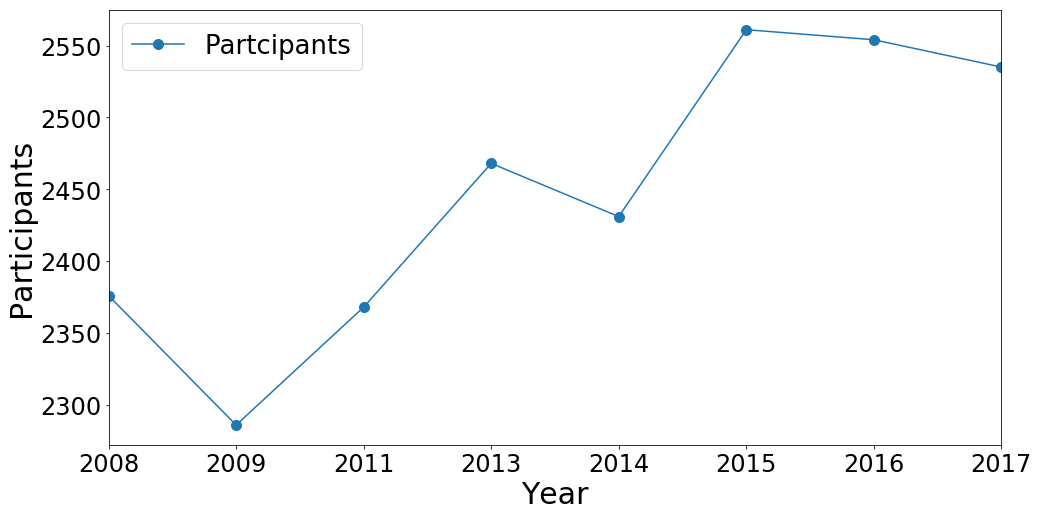

In [86]:
plt.figure()
ax = yearly.size().plot(kind='line', figsize=(16, 8), fontsize = 24, marker = 'o', ms=10)
ax.set_ylabel('Participants', fontsize = 30)

ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Partcipants'], frameon=True, ncol=2, loc='upper left', fontsize = 26)

The participation level has been very steady in the last eight renewals of the race. 2015 has the highest participation rate and is the first race to go over 2500 participants. We know ultramarathons are becoming increasingly popular so an increase in participation greater than this would have been expected. There is quite possibly a cap on the number of runners, most likely due to safety concerns. Overall, there is a rising trend from 2009 to 2015, with a slight fall after that. The number of participants has not dropped below 2250. The breakdown of these participation figures would be pivotal in us gaining more knowledge about the type of people who participate in the UTMB. 

###  Participation per Category

In total there are 13 different categories. The exact meaning of the category names is not clear in the initial dataset. They are abbreviations of French words, so I reserched what they meant and renamed them. This made it clearer for me analysing the data as well as for anyone who would read the code. For example, the categpry ‘V1 H’ has been renamed to ‘Masters Men 1’, and I have included the age group of this category, which is between 40 and 49 years old. This increases the information value of these categories.

In [87]:
cat = df.groupby('category')['name_mask'].count()
cat.sort_values(ascending = False)

category
V1 H    7881
SE H    6042
V2 H    3393
V1 F     719
SE F     646
V3 H     520
V2 F     287
ES H      34
V4 H      29
V3 F      26
ES F       2
Name: name_mask, dtype: int64

In [88]:
df['category'] = df['category'].replace({'ES F':'Youth Women (20-22)', 'ES H':'Youth Men (20-22)',
                                        'JU H':'Junior Men (20-)',
                                         'SE F':'Senior Women (23-39)', 'SE H':'Senior Men (23-39)', 'V1 H':'Masters Men 1 (40-49)',
                                         'V2 H':'Masters Men 2 (50-59)', 'V3 H':'Masters Men 3 (60-69)', 'V4 H':'Masters Men 4 (70-79)',
                                         'V5 H':'Masters Men 5 (80+)', 'V1 F':'Masters Women 1 (40-49)', 'V2 F':'Masters Women 2 (50-59)',
                                          'V3 F':'Masters Women 3 (60-69)', 'V4 F':'Masters Women 4 (70-79)', 'V5 F':'Masters Women 5 (80+)',
                                        })

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
cat = df.groupby('category')['name_mask'].count()
cat = cat.sort_values(ascending = False)

In [90]:
cat.transpose()

category
Masters Men 1 (40-49)      7881
Senior Men (23-39)         6042
Masters Men 2 (50-59)      3393
Masters Women 1 (40-49)     719
Senior Women (23-39)        646
Masters Men 3 (60-69)       520
Masters Women 2 (50-59)     287
Youth Men (20-22)            34
Masters Men 4 (70-79)        29
Masters Women 3 (60-69)      26
Youth Women (20-22)           2
Name: name_mask, dtype: int64

Text(0.5,0,'Particpants')

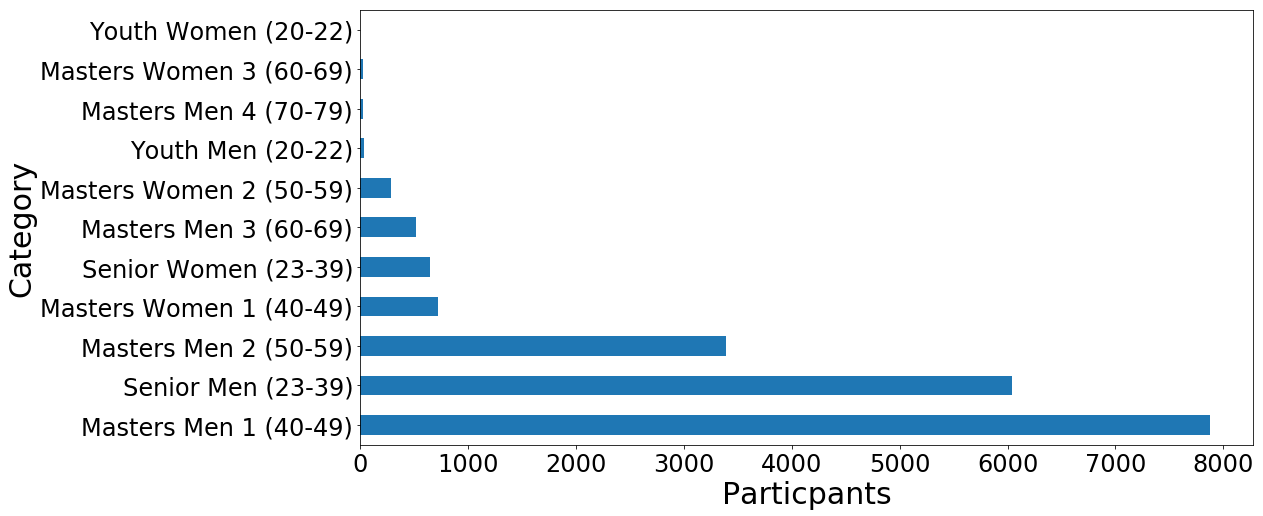

In [94]:
plt.figure()
ax = cat.plot.barh(figsize=(16, 8), fontsize = 24)
ax.set_ylabel('Category', fontsize = 30)

ax.set_xlabel('Particpants', fontsize = 30)

The Masters Men 1 (aged 40-49) category has more participants than any other category, followed by Senior Men (aged 23-39) and Masters Men 2 (aged 50-59). This reflects the earlier related work by Knechtle, who stated that a typical ultramarathon runner was around 45 years old. The fourth highest category is the highest female category, with Masters Women 1 having 987 participants in total. Masters Women 4 had the lowest number of runners, with only one woman between the age of 70 and 79 participating in the race. The UTMB is a male dominated race overall and this poses the questions whether if the races are dominated by males every year, and if the participation of females is rising. Below we have the breakdown of the particpants per category for each year, and again we see how males dominate the participation rates. 

In [95]:
df.groupby(['category', 'Year'])['name_mask'].count().unstack()

Year,2008,2009,2011,2013,2014,2015,2016,2017
category,,,,,,,,
Masters Men 1 (40-49),918.0,956.0,969.0,986.0,955.0,1033.0,1028.0,1036.0
Masters Men 2 (50-59),417.0,379.0,425.0,440.0,422.0,464.0,412.0,434.0
Masters Men 3 (60-69),87.0,61.0,74.0,60.0,61.0,60.0,60.0,57.0
Masters Men 4 (70-79),2.0,4.0,6.0,4.0,3.0,3.0,2.0,5.0
Masters Women 1 (40-49),86.0,69.0,80.0,92.0,86.0,91.0,107.0,108.0
Masters Women 2 (50-59),28.0,37.0,32.0,44.0,29.0,36.0,43.0,38.0
Masters Women 3 (60-69),2.0,3.0,3.0,2.0,6.0,6.0,3.0,1.0
Senior Men (23-39),773.0,700.0,704.0,750.0,787.0,777.0,793.0,758.0
Senior Women (23-39),56.0,69.0,71.0,85.0,77.0,89.0,104.0,95.0


###  Participation per Gender

To look at the participation per gender we need to first create a 'Gender' column. This is done by combining the male categories and the female cateogories. 

In [96]:
df['gender'] = df['category'].replace({'Youth Women (20-22)':'Female', 'Youth Men (20-22)':'Male',
                                        'Junior Men (20-)':'Male',
                                         'Senior Women (23-39)':'Female', 'Senior Men (23-39)':'Male', 'Masters Men 1 (40-49)':'Male',
                                         'Masters Men 2 (50-59)':'Male', 'Masters Men 3 (60-69)':'Male', 'Masters Men 4 (70-79)':'Male',
                                         'Masters Men 5 (80+)':'Male', 'Masters Women 1 (40-49)':'Female', 'Masters Women 2 (50-59)':'Female',
                                          'Masters Women 3 (60-69)':'Female', 'Masters Women 4 (70-79)':'Female', 'Masters Women 5 (80+)':'Female',
                                        })

In [97]:
df.head()

,Unnamed: 0,Year,bib,name_mask,team,category,rank,nationality,time,timediff,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,gender
0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Senior Men (23-39),1,FR,19:01:54,00:00:00,01:11:50,NaN,NaN,01:45:05,NaN,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,NaN,NaN,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,NaN,NaN,14:55:05,NaN,NaN,15:24:59,NaN,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54,Male
1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Senior Men (23-39),2,ES,19:16:59,00:15:05,01:10:00,NaN,NaN,01:44:21,NaN,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,NaN,NaN,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,NaN,NaN,15:13:06,NaN,NaN,15:41:22,NaN,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59,Male
2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Senior Men (23-39),3,US,19:53:00,00:51:06,01:15:24,NaN,NaN,01:48:38,NaN,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,NaN,NaN,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,NaN,NaN,15:45:55,NaN,NaN,16:12:00,NaN,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00,Male
3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Senior Men (23-39),4,FR,20:03:39,01:01:45,01:11:51,NaN,NaN,01:45:08,NaN,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,NaN,NaN,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,NaN,NaN,15:58:54,NaN,NaN,16:28:53,NaN,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39,Male
4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Senior Men (23-39),5,US,20:11:38,01:09:44,01:09:59,NaN,NaN,01:42:15,NaN,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,NaN,NaN,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,NaN,NaN,16:11:03,NaN,NaN,16:35:32,NaN,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38,Male


In [98]:
df = df[[ 'Unnamed: 0'  ,  'Year', 
'bib'              ,
'name_mask'           ,
'team'           ,
'gender',
'category'        , 
'rank'             ,
'nationality'      ,
'time'             ,
'timediff'         ,
'Chamonix to Delevret'            ,
#'Chamonix to Col de Voza'          ,
'Chamonix to La Charme'          ,
'Chamonix to St-Gervais'          ,
'Delevret to St-Gervais'            ,
#'Col de Voza to Contamines'          ,
'La Charme to St-Gervais'          ,
'St-Gervais to Contamines'          ,
'Contamines to La Balme'            ,
#'Contamines to Bonhomme'          ,
'La Balme to Bonhomme'          ,
#'La Balme to Chapieux'          ,
'Bonhomme to Chapieux'          ,
'Chapieux to Col Seigne'            ,
#'Col Seigne to Refuge Elisabeth'          ,
'Col Seigne to Lac Combal'          ,
#'Col Seigne to Mt-Favre'          ,
#'Refuge Elisabeth to Mt-Favre'         ,
#'Refuge Elisabeth to Checruit'        ,
'Lac Combal to Mt-Favre'         ,
'Mt-Favre to Checruit'         ,
#'Mt-Favre to Courmayeur'        ,
'Checruit to Courmayeur'        ,
'Courmayeur to Courmayeur2'          ,
'Courmayeur2 to Bertone'          ,
'Courmayeur to Bertone'        ,
#'Bertone to Refuge Elena'         ,
'Bertone to Bonatti'         ,
#'Refuge Elena to Col Ferret'          ,
'Bonatti to Arnouvaz'        ,
'Arnouvaz to Col Ferret'         ,
#'Col Ferret to La Peulaz'         ,
'Col Ferret to La Fouly'        ,
#'La Peulaz to La Fouly'          ,
#'La Fouly to Praz de Fort'     ,
'La Fouly to Champex La'        ,
#'Praz de Fort to Champex La'        ,
#'Praz de Fort to Champex den Bas',
'Champex La to Bovine'        ,
'Champex La to Mortigny'        ,
'Champex La to Giete'        ,
#'Champex den Bas to Bovine'        ,
'Bovine to Trient'         ,
'Mortigny to Trient'         ,
'Giete to Trient'          ,
'Trient to La Catogne'        ,
'Trient to Les Tseppe'        ,
#'Trient to Vallorcine'        ,
'La Catogne to Vallorcine'         ,
'Les Tseppe to Vallorcine'         ,
#'Vallorcine to La Gardes'         ,
'Vallorcine to Tete aux Vents'         ,
'Vallorcine to Argentiere'         ,
'Vallorcine to Col Montet'         ,
#'La Gardes to Chamonix'        ,
'Tete aux Vents to Flegere'          ,
'Argentiere to Chamonix'     ,
'Col Montet to Flegere'        ,
'Flegere to Chamonix'   ]]

In [99]:
df.head()

,Unnamed: 0,Year,bib,name_mask,team,gender,category,rank,nationality,time,timediff,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,19:01:54,00:00:00,01:11:50,NaN,NaN,01:45:05,NaN,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,NaN,NaN,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,NaN,NaN,14:55:05,NaN,NaN,15:24:59,NaN,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54
1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,19:16:59,00:15:05,01:10:00,NaN,NaN,01:44:21,NaN,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,NaN,NaN,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,NaN,NaN,15:13:06,NaN,NaN,15:41:22,NaN,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59
2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,19:53:00,00:51:06,01:15:24,NaN,NaN,01:48:38,NaN,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,NaN,NaN,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,NaN,NaN,15:45:55,NaN,NaN,16:12:00,NaN,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00
3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,20:03:39,01:01:45,01:11:51,NaN,NaN,01:45:08,NaN,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,NaN,NaN,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,NaN,NaN,15:58:54,NaN,NaN,16:28:53,NaN,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39
4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,20:11:38,01:09:44,01:09:59,NaN,NaN,01:42:15,NaN,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,NaN,NaN,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,NaN,NaN,16:11:03,NaN,NaN,16:35:32,NaN,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38


In [100]:
yearly_gender = df.groupby(['Year', 'gender'])['name_mask'].count()
yearly_gender.unstack()

gender,Female,Male
Year,,
2008,172,2204
2009,179,2107
2011,186,2182
2013,223,2245
2014,199,2232
2015,222,2339
2016,257,2297
2017,242,2293


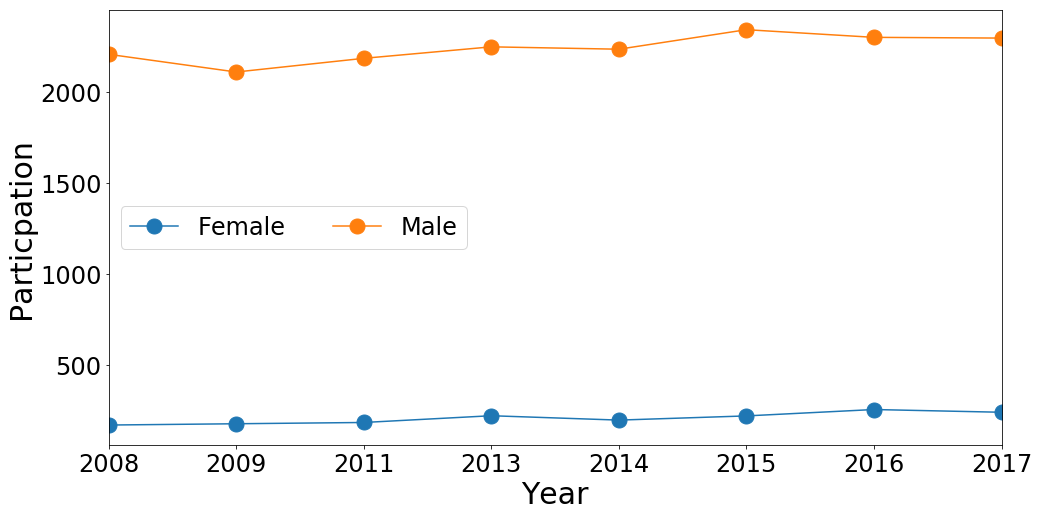

In [104]:
gen = df.groupby(['Year', 'gender'])['name_mask'].count().unstack()
ax = gen.plot(figsize=(16, 8), fontsize=24, marker='o', ms=15)
ax.set_ylabel('Particpation', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Female', 'Male'], frameon=True, ncol=2, loc='center left', fontsize = 24)

The number of women participants has ranged from 172 to a max 257 since 2008. Since 2013 the number has been above 199 so it is becoming increasingly popular. The number of male runners has also increased. In 2008 there were 2204 runners, and that number has maxed at 2339. There has not been less than 2100 male participants. The gap between the number of male and female particpants remains at around 2000. Despite there being a slight increase in the number of females participating, the rises are not drastic.

### Participation per Team

Athletes who are part of a team are thought to be better runners. I wanted to investigate this. 

The final factors of finding what kind of people particpate in the UTMB are whether they are club runners or not, and what nationality they are. The ‘team’ column was also very interesting. 4903 particpants were not a member of a team, while 9773 participants were members of a team.

In [105]:
noteam = df['team'].isnull().sum()
yesteam = df['team'].count()
yesteam1 = yesteam - noteam
ntpercent = (noteam / yesteam) * 100
yespercent = (yesteam1 / yesteam) * 100
print ('number of runners with no team: ', noteam)
print ('number of runners with team: ', yesteam1)
print ('percentage of runners with no team: ', ntpercent)
print ('percentage of runners with a team: ', yespercent)

number of runners with no team:  4903
number of runners with team:  9773
percentage of runners with no team:  33.4082856364
percentage of runners with a team:  66.5917143636


67 per cent of runners are members of a team. This shows that most runners are experienced, and would more than likely be following a stricter training regime. Just over a third of runners have no team, which suggests they may be running to achieve a personal goal. 

I split the data into male and female to see if there is a trend for either genders being part of a team. 

In [106]:
womteam = df[df['gender'] == 'Female']

In [107]:
menteam = df[df['gender'] == 'Male']

In [108]:
noteam = menteam['team'].isnull().sum()
yesteam = menteam['team'].count()
yesteam1 = yesteam - noteam
ntpercent = (noteam / yesteam) * 100
yespercent = (yesteam1 / yesteam) * 100
print ('number of male runners with no team: ', noteam)
print ('number of male runners with team: ', yesteam1)
print ('percentage of male runners with no team: ', ntpercent)
print ('percentage of male runners with a team: ', yespercent)

number of male runners with no team:  4538
number of male runners with team:  8823
percentage of male runners with no team:  33.9645236135
percentage of male runners with a team:  66.0354763865


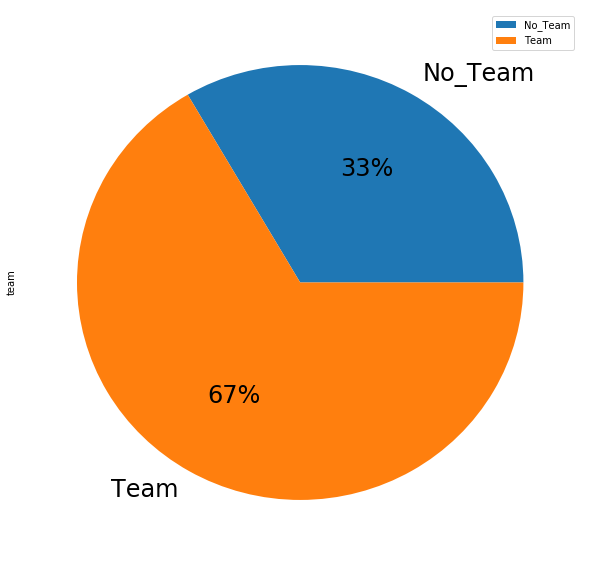

In [109]:
teamcheck = pd.DataFrame({'team': [4903, 9773]},
                  index=['No_Team', 'Team'])
plot = teamcheck.plot.pie(y='team', figsize=(10, 10), autopct='%1.0f%%', fontsize=24)


In [110]:
noteam = womteam['team'].isnull().sum()
yesteam = womteam['team'].count()
yesteam1 = yesteam - noteam
ntpercent = (noteam / yesteam) * 100
yespercent = (yesteam1 / yesteam) * 100
print ('number of female runners with no team: ', noteam)
print ('number of female runners with team: ', yesteam1)
print ('percentage of female runners with no team: ', ntpercent)
print ('percentage of female runners with a team: ', yespercent)

number of female runners with no team:  365
number of female runners with team:  950
percentage of female runners with no team:  27.7566539924
percentage of female runners with a team:  72.2433460076


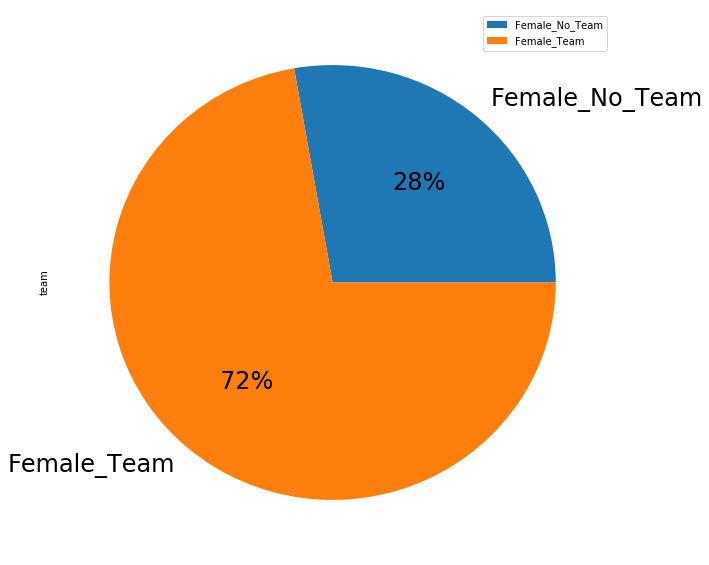

In [111]:
teamcheck = pd.DataFrame({'team': [365, 950]},
                  index=['Female_No_Team', 'Female_Team'])
plot = teamcheck.plot.pie(y='team', figsize=(10, 10), autopct='%1.0f%%', fontsize=24)

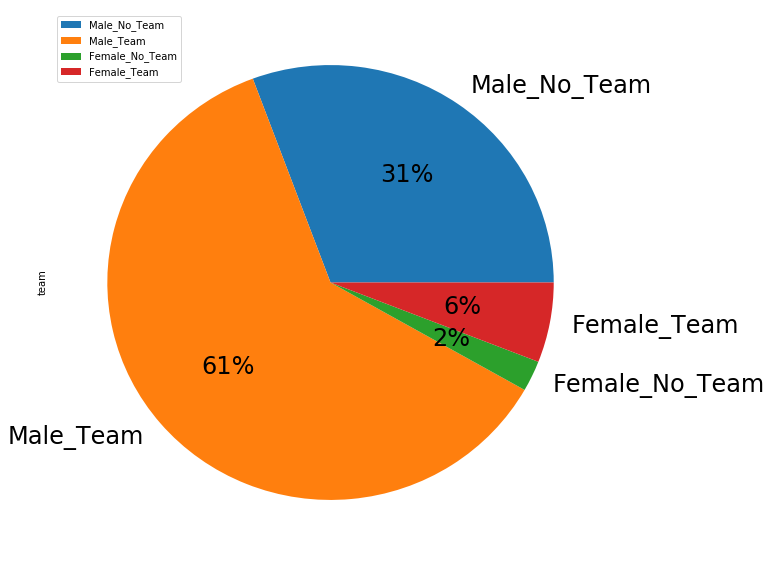

In [112]:
teamcheck = pd.DataFrame({'team': [4903, 9773, 365, 950]},
                  index=['Male_No_Team', 'Male_Team', 'Female_No_Team', 'Female_Team'])
plot = teamcheck.plot.pie(y='team', figsize=(10, 10), autopct='%1.0f%%', fontsize=24)

Only 2% of all runners are female and don’t have a team. This means 6% of particpants are female and are members of a team. This indicates that the female particpants are made up of more elite runners, who have more experience and better training. If this is true, females should be performing better relative to males. 

### Participation per nationality

Text(0.5,0,'Nationality')

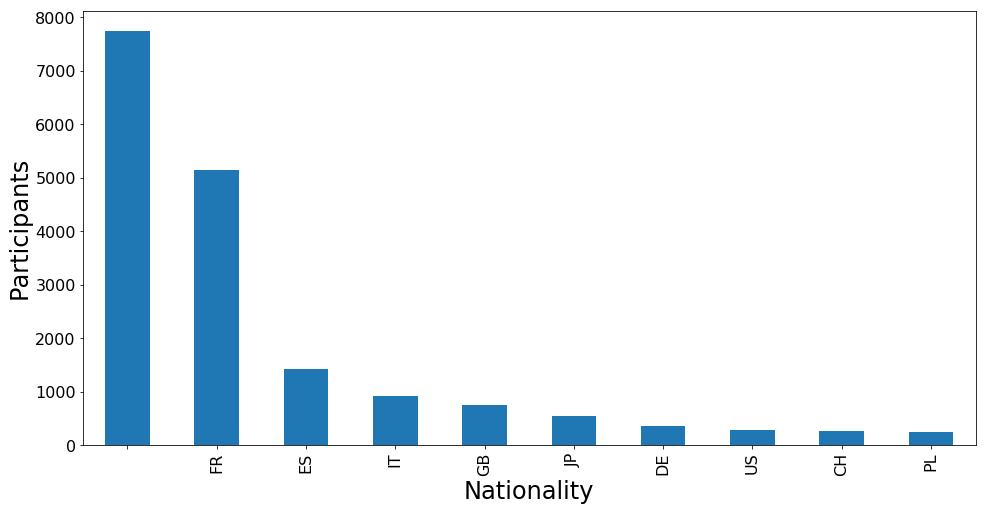

In [113]:
nat = df.groupby('nationality')['name_mask'].count()
natplot = nat.sort_values(ascending = False).head(10)


ax = natplot.plot.bar(x='nationality', figsize=(16, 8), fontsize=16)

ax.set_ylabel('Participants', fontsize = 24)
ax.set_xlabel('Nationality', fontsize = 24)

Excluding the home nation of the starting point, France, who had the highest number of participants, neighbouring countries Spain, Italy and Great Britain completed the top 5. Switzerland do not feature in the top 10, despite much of the race going through their country. Excluding the unkown countries, there are 84 nationalities represented in the UTMB over the 8 years in the dataset. The fact that there is not full data available for nationalities may scupper any chance of discovering how important racing in a home nation would be.

In [114]:
df.to_csv('../../data/df_full_08_17.csv')

In [115]:
df.shape

(19579, 50)

In [116]:
df = pd.read_csv('../../data/df_full_08_17.csv', encoding = "ISO-8859-1")

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (12,13,15,16,26,27,35,36,38,39,41,43,45,46,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [117]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,time,timediff,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,19:01:54,00:00:00,01:11:50,NaN,NaN,01:45:05,NaN,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,NaN,NaN,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,NaN,NaN,14:55:05,NaN,NaN,15:24:59,NaN,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54
1,1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,19:16:59,00:15:05,01:10:00,NaN,NaN,01:44:21,NaN,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,NaN,NaN,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,NaN,NaN,15:13:06,NaN,NaN,15:41:22,NaN,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59
2,2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,19:53:00,00:51:06,01:15:24,NaN,NaN,01:48:38,NaN,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,NaN,NaN,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,NaN,NaN,15:45:55,NaN,NaN,16:12:00,NaN,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00
3,3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,20:03:39,01:01:45,01:11:51,NaN,NaN,01:45:08,NaN,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,NaN,NaN,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,NaN,NaN,15:58:54,NaN,NaN,16:28:53,NaN,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39
4,4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,20:11:38,01:09:44,01:09:59,NaN,NaN,01:42:15,NaN,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,NaN,NaN,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,NaN,NaN,16:11:03,NaN,NaN,16:35:32,NaN,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38


In [118]:
pd.set_option('display.max_columns', 500)

In [119]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

,Year,bib,name_mask,team,gender,category,rank,nationality,time,timediff,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,19:01:54,00:00:00,01:11:50,NaN,NaN,01:45:05,NaN,02:41:09,03:33:40,04:28:07,04:53:31,06:18:02,06:37:51,07:15:35,07:39:09,08:02:18,NaN,NaN,08:54:29,09:44:00,10:17:44,11:11:12,12:04:26,13:24:20,NaN,NaN,14:55:05,NaN,NaN,15:24:59,NaN,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54
1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,19:16:59,00:15:05,01:10:00,NaN,NaN,01:44:21,NaN,02:41:01,03:33:45,04:29:18,04:54:39,06:18:04,06:37:54,07:15:37,07:39:16,08:02:49,NaN,NaN,08:57:30,09:48:28,10:23:53,11:18:54,12:12:40,13:33:52,NaN,NaN,15:13:06,NaN,NaN,15:41:22,NaN,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59
2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,19:53:00,00:51:06,01:15:24,NaN,NaN,01:48:38,NaN,02:45:17,03:41:50,04:41:04,05:10:05,06:40:51,07:02:40,07:42:45,08:08:05,08:33:53,NaN,NaN,09:29:48,10:21:27,10:55:21,NaN,12:46:12,14:08:23,NaN,NaN,15:45:55,NaN,NaN,16:12:00,NaN,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00
3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,20:03:39,01:01:45,01:11:51,NaN,NaN,01:45:08,NaN,02:41:11,03:33:45,04:38:06,05:07:23,06:41:10,07:04:45,07:45:38,08:11:11,08:37:54,NaN,NaN,09:38:22,10:31:58,11:09:38,12:09:17,13:00:59,14:22:44,NaN,NaN,15:58:54,NaN,NaN,16:28:53,NaN,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39
4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,20:11:38,01:09:44,01:09:59,NaN,NaN,01:42:15,NaN,02:39:45,03:33:20,04:27:43,04:53:05,06:18:03,06:37:10,07:10:38,07:33:52,07:58:34,NaN,NaN,08:51:50,09:44:06,10:17:38,11:11:10,12:09:51,13:55:02,NaN,NaN,16:11:03,NaN,NaN,16:35:32,NaN,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38
5,2017,17,f94453abd655927dc15006974bce67ad,The North Face / Buff,Male,Senior Men (23-39),6,ES,20:12:43,01:10:49,01:13:16,NaN,NaN,01:46:46,NaN,02:43:57,03:37:13,04:35:55,05:04:53,06:34:38,06:55:57,07:37:29,08:00:59,08:25:08,NaN,NaN,09:24:11,10:19:34,10:57:51,12:01:54,12:59:54,14:22:45,NaN,NaN,15:58:47,NaN,NaN,16:28:31,NaN,17:12:38,NaN,17:57:23,NaN,NaN,18:28:03,NaN,NaN,19:39:00,20:12:43
6,2017,9,5a376cf8730a72a85ed45ec976ce3ccf,The North Face,Male,Senior Men (23-39),7,US,20:19:48,01:17:54,01:14:18,NaN,NaN,01:49:00,NaN,02:46:22,03:41:50,04:41:02,05:10:25,06:40:29,07:02:41,07:42:41,08:08:03,08:33:52,NaN,NaN,09:28:43,10:19:44,10:54:42,NaN,12:52:06,14:18:09,NaN,NaN,15:55:00,NaN,NaN,16:24:07,NaN,17:11:31,NaN,17:55:42,NaN,NaN,18:27:34,NaN,NaN,19:41:21,20:19:48
7,2017,13,f9afc937b3b009afc6def5029e0cf169,VIBRAM,Male,Senior Men (23-39),8,LT,21:24:19,02:22:25,01:14:14,NaN,NaN,01:48:21,NaN,02:44:49,03:36:12,04:37:51,05:07:41,06:38:08,07:01:04,07:43:57,08:10:44,08:39:05,NaN,NaN,NaN,10:41:31,11:20:15,12:24:53,13:24:45,14:55:27,NaN,NaN,16:40:49,NaN,NaN,17:13:27,NaN,18:04:53,NaN,18:55:24,NaN,NaN,19:28:09,NaN,NaN,20:44:41,21:24:19
8,2017,8,bf7a0557fac70cfc49d7d7c67bccf3e7,THE NORTH FACE,Male,Senior 